Second Try with a different dataset (RANDOM FOREST)

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
#reading in the dataframes
df_BMW_raw = pd.read_csv("BMW_bike.csv", delimiter = ",", usecols=[0, 1, 2, 3], dtype={"mileage":"string", "price":"string", "Bike":"string", "Types and Used Time": "string"})
df_ducatti_raw = pd.read_csv("ducatti_bike.csv", delimiter = ",", usecols=[0, 1, 2, 3])
df_KTM_raw = pd.read_csv("KTM_bike.csv", delimiter = ",", usecols=[0, 1, 2, 3])
df_Royal_Enfield_raw = pd.read_csv("Royal_Enfield_Standard_bike.csv", delimiter = ",", usecols=[0, 1, 2, 3])
df_Suzuki_raw = pd.read_csv("Suzuki_bike.csv", delimiter = ",",usecols=[0, 1, 2, 3])
df_Yamaha_raw = pd.read_csv("Yamaha_bike.csv", delimiter = ",",usecols=[0, 1, 2, 3])
df_bikez =  pd.read_csv("all_bikez_curated.csv", delimiter = ",", dtype={"Brand":"string", "Model":"string", "Year":int, "Category":"string", "Rating":float, "Displacement (ccm)":float, "Power (hp)":float, "Torque(Nm)":float, "Engine cylinder":"string", "Engine stroke":"string",'Gearbox':"string", 'Bore (mm)':float, 'Stroke (mm)':"string", 'Fuel capacity (lts)':float,
       'Fuel system':"string", 'Fuel control':"string", 'Cooling system':"string", 'Transmission type':"string",
       'Dry weight (kg)':float, 'Wheelbase (mm)':float, 'Seat height (mm)':float, 'Front brakes':"string",
       'Rear brakes':"string", 'Front tire':"string", 'Rear tire':"string", 'Front suspension':"string",
       'Rear suspension':"string", 'Color options':"string"})

df_BMW_raw = df_BMW_raw.dropna(subset=["mileage"])
df_BMW_raw["Bike"] = df_BMW_raw["Bike"].str.lower()

df_ducatti_raw = df_ducatti_raw.dropna(subset=["mileage"])
df_ducatti_raw = df_ducatti_raw.rename(columns={"Bike name": "Bike", "Time of USed": "Types and Used Time"})
df_ducatti_raw["Bike"] = df_ducatti_raw["Bike"].str.lower()

df_KTM_raw = df_KTM_raw.dropna(subset=["mileage"])
df_KTM_raw["Bike"] = df_KTM_raw["Bike"].str.lower()

df_Royal_Enfield_raw = df_Royal_Enfield_raw.dropna(subset=["mileage"])
df_Royal_Enfield_raw = df_Royal_Enfield_raw.rename(columns={"bike": "Bike", "Types": "Types and Used Time"})
df_Royal_Enfield_raw["Bike"] = df_Royal_Enfield_raw["Bike"].str.lower()

df_Suzuki_raw = df_Suzuki_raw.dropna(subset=["mileage"])
df_Suzuki_raw = df_Suzuki_raw.rename(columns={"BIke name": "Bike"})
df_Suzuki_raw["Bike"] = df_Suzuki_raw["Bike"].str.lower()

df_Yamaha_raw = df_Yamaha_raw.dropna(subset=["mileage"])
df_Yamaha_raw = df_Yamaha_raw.rename(columns={"Bike name": "Bike", "Types and Used  Time": "Types and Used Time"})
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.lower()

df_bikez = df_bikez.rename(columns={"Model": "Bike"})
df_bikez["Bike"] = df_bikez["Bike"].str.lower()

In [49]:
df_bikez_bmw = df_bikez[df_bikez["Brand"] == "bmw"]
df_bikez_royal_enfield = df_bikez[df_bikez["Brand"] == "enfield"]
df_bikez_ducatti = df_bikez[df_bikez["Brand"] == "ducati"]
df_bikez_ktm = df_bikez[df_bikez["Brand"] == "ktm"]
df_bikez_suzuki = df_bikez[df_bikez["Brand"] == "suzuki"]
df_bikez_yamaha = df_bikez[df_bikez["Brand"] == "yamaha"]

In [50]:
df_BMW_raw["Year"] = df_BMW_raw["Types and Used Time"].str.split('BMW').str[0]
df_BMW_raw["Year"] = df_BMW_raw["Year"].replace("New", "", regex=True).astype(int)

df_BMW_raw["Bike"] = df_BMW_raw["Bike"].replace(" ", "", regex=True)
df_bikez_bmw["Bike"] = df_bikez_bmw["Bike"].replace(" ", "", regex=True)

df_BMW_raw["Bike"] = df_BMW_raw["Bike"].str.split('first').str[0]
df_BMW_raw["Bike"] = df_BMW_raw["Bike"].replace("[/]", "", regex=True)
df_BMW_raw["Bike"] = df_BMW_raw["Bike"].replace("r1100sboxercup", "r1100sboxercupreplica", regex=True)
df_BMW_raw["Bike"] = df_BMW_raw["Bike"].replace("r1250", "r1250gs", regex=True)
df_BMW_raw["Bike"] = df_BMW_raw["Bike"].replace("r1100rtabs", "r1100rt", regex=True)
df_BMW_raw["Bike"] = df_BMW_raw["Bike"].replace("r807", "r80", regex=True)
df_BMW_raw["Bike"] = df_BMW_raw["Bike"].str.replace(r'(^.*r1250gs.*$)', 'r1250gs', regex=True)
df_BMW_raw["Bike"] = df_BMW_raw["Bike"].str.replace(r'(^.*s1000xr.*$)', 's1000xr', regex=True)
df_BMW_raw["Bike"] = df_BMW_raw["Bike"].str.replace(r'(^.*g310.*$)', 'g310r', regex=True)
df_BMW_raw["Bike"] = df_BMW_raw["Bike"].str.replace(r'(^.*k1600b.*$)', 'k1600b', regex=True)
df_BMW_raw["Bike"] = df_BMW_raw["Bike"].str.replace(r'(^.*r1250.*$)', 'r1250gs', regex=True)
df_BMW_raw["Bike"] = df_BMW_raw["Bike"].str.replace(r'(^.*r18.*$)', 'r18', regex=True)
df_BMW_raw["Bike"] = df_BMW_raw["Bike"].str.replace(r'(^.*s1000r.*$)', 's1000r', regex=True)
df_BMW_raw["Bike"] = df_BMW_raw["Bike"].str.replace(r'(^.*f900r.*$)', 'f900r', regex=True)
df_BMW_raw["Bike"] = df_BMW_raw["Bike"].str.replace(r'(^.*f900xr.*$)', 'f900xr', regex=True)
df_BMW_raw["Bike"] = df_BMW_raw["Bike"].str.replace(r'(^.*r1200rt.*$)', 'r1200rt', regex=True)
df_BMW_raw["Bike"] = df_BMW_raw["Bike"].str.replace(r'(^.*ce04.*$)', 'ce04', regex=True)
df_BMW_raw["Bike"] = df_BMW_raw["Bike"].str.replace(r'(^.*r1200gsadventure.*$)', 'r1200gsadventure', regex=True)
df_BMW_raw["Bike"] = df_BMW_raw["Bike"].str.replace(r'(^.*f850gsadventure.*$)', 'f850gsadventure', regex=True)
df_BMW_raw["Bike"] = df_BMW_raw["Bike"].str.replace(r'(^.*f800gt.*$)', 'f800gt', regex=True)
df_BMW_raw["Bike"] = df_BMW_raw["Bike"].str.replace(r'(^.*f800gs.*$)', 'f800gs', regex=True)
df_BMW_raw["Bike"] = df_BMW_raw["Bike"].str.replace(r'(^.*s1000.*$)', 's1000rr', regex=True)
df_BMW_raw["Bike"] = df_BMW_raw["Bike"].str.replace(r'(^.*r1250rt.*$)', 'r1250rt', regex=True)
df_BMW_raw["Bike"] = df_BMW_raw["Bike"].str.replace(r'(^.*m1000r.*$)', 'm1000rr', regex=True)
df_BMW_raw["Bike"] = df_BMW_raw["Bike"].str.replace(r'(^.*f750.*$)', 'f750gs', regex=True)
df_BMW_raw["Bike"] = df_BMW_raw["Bike"].str.replace(r'(^.*f850gs.*$)', 'f850gs', regex=True)
df_BMW_raw["Bike"] = df_BMW_raw["Bike"].str.replace(r'(^.*k1600.*$)', 'k1600b', regex=True)
df_BMW_raw["Bike"] = df_BMW_raw["Bike"].str.replace(r'(^.*r1000.*$)', 'm1000rr', regex=True)
df_BMW_raw["Bike"] = df_BMW_raw["Bike"].str.replace(r'(^.*r1200.*$)', 'r1200avantgarde', regex=True)
df_BMW_raw["Bike"] = df_BMW_raw["Bike"].str.replace(r'(^.*r1200gs.*$)', 'r1200gs', regex=True)

/tmp/ipykernel_32956/2619773030.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bikez_bmw["Bike"] = df_bikez_bmw["Bike"].replace(" ", "", regex=True)


In [51]:
df_BMW = pd.merge(df_BMW_raw, df_bikez_bmw, how = "left",  on = ["Bike", "Year"])
df_BMW = df_BMW.drop_duplicates(subset = ["mileage", "price", "Bike", "Year"], keep = "first")
df_merged_temp = pd.merge(df_BMW_raw, df_bikez_bmw, how = "left",  on = ["Bike"])
df_merged_temp = df_merged_temp.drop_duplicates(subset = ["Bike"], keep = "first") #jedes Modell ein uniquer Index
df_merged_temp.reset_index(inplace=True, drop=True)
df_BMW.reset_index(inplace=True, drop=True)


df_BMW["Category"].fillna(df_BMW['Bike'].map(df_merged_temp.set_index(['Bike'])['Category']), inplace=True)
df_BMW["Displacement (ccm)"].fillna(df_BMW['Bike'].map(df_merged_temp.set_index(['Bike'])['Displacement (ccm)']), inplace=True) 
df_BMW["Power (hp)"].fillna(df_BMW['Bike'].map(df_merged_temp.set_index(['Bike'])['Power (hp)']), inplace=True) 
df_BMW["Torque (Nm)"].fillna(df_BMW['Bike'].map(df_merged_temp.set_index(['Bike'])['Torque (Nm)']), inplace=True) 
df_BMW["Engine stroke"].fillna(df_BMW['Bike'].map(df_merged_temp.set_index(['Bike'])['Engine stroke']), inplace=True) 
#df_BMW["Dry weight (kg)"].fillna(df_BMW['Bike'].map(df_merged_temp.set_index(['Bike'])['Dry weight (kg)']), inplace=True)
df_BMW["Brand"].fillna(df_BMW['Bike'].map(df_merged_temp.set_index(['Bike'])['Brand']), inplace=True) 

df_BMW = df_BMW.dropna(subset=["Category"])

df_BMW = df_BMW.drop(columns = ['Rating', 'Wheelbase (mm)', 'Seat height (mm)', 'Front brakes', 'Gearbox', 'Bore (mm)', 
       'Stroke (mm)','Fuel capacity (lts)', 'Fuel system','Fuel control', 'Cooling system', 'Transmission type' ,'Rear brakes', 'Front tire', 'Rear tire', 'Front suspension',
       'Rear suspension', 'Color options', 'Dry weight (kg)'])

df_BMW = df_BMW.drop_duplicates(subset = ["mileage", "price", "Bike", "Year"], keep = "first")

#df_BMW["Dry weight (kg)"].fillna(value=df_BMW.groupby(['Category'])['Dry weight (kg)'].mean(), inplace=True)
#df_BMW["Dry weight (kg)"].fillna(value=df_BMW['Dry weight (kg)'].mean(), inplace=True)

df_BMW["Displacement (ccm)"].fillna(value=df_BMW.groupby('Category')["Displacement (ccm)"].mean(), inplace=True) 
df_BMW["Displacement (ccm)"].fillna(value=df_BMW["Displacement (ccm)"].mean(), inplace=True) 

df_BMW["Power (hp)"].fillna(value=df_BMW.groupby('Category')["Power (hp)"].mean(), inplace=True) 
df_BMW["Power (hp)"].fillna(value=df_BMW["Power (hp)"].mean(), inplace=True) 

df_BMW["Torque (Nm)"].fillna(value=df_BMW.groupby('Category')["Torque (Nm)"].mean(), inplace=True) 
df_BMW["Torque (Nm)"].fillna(value=df_BMW["Torque (Nm)"].mean(), inplace=True) 

df_BMW["mileage"] = df_BMW["mileage"].replace("[miles,]", "", regex=True).astype(int)
df_BMW = df_BMW.loc[df_BMW["price"]!= "No Price Listed"]
df_BMW["price"] = df_BMW["price"].replace("[$,]", "", regex=True).astype(int)


$\textbf{BMW CLEANING DONE}$

In [52]:
df_Royal_Enfield_raw["Year"] = df_Royal_Enfield_raw["Types and Used Time"].str.split('Royal').str[0]
df_Royal_Enfield_raw["Year"] = df_Royal_Enfield_raw["Year"].replace("New", "", regex=True)
df_Royal_Enfield_raw["Year"] = df_Royal_Enfield_raw["Year"].replace("Used", "", regex=True).astype(int)

df_Royal_Enfield_raw["Bike"] = df_Royal_Enfield_raw["Bike"].replace(" ", "", regex=True)
df_bikez_royal_enfield["Bike"] = df_bikez_royal_enfield["Bike"].replace(" ", "", regex=True)
df_Royal_Enfield_raw["Bike"] = df_Royal_Enfield_raw["Bike"].str.replace(r'(^.*himalayan.*$)', 'himalayan', regex=True)
df_Royal_Enfield_raw["Bike"] = df_Royal_Enfield_raw["Bike"].str.replace(r'(^.*continentalgt.*$)', 'continentalgt', regex=True)
df_Royal_Enfield_raw["Bike"] = df_Royal_Enfield_raw["Bike"].str.replace(r'(^.*classic350.*$)', 'classic350', regex=True)
df_Royal_Enfield_raw["Bike"] = df_Royal_Enfield_raw["Bike"].str.replace(r'(^.*int650.*$)', 'interceptor650', regex=True)
df_Royal_Enfield_raw["Bike"] = df_Royal_Enfield_raw["Bike"].str.replace(r'(^.*meteor350.*$)', 'meteor350', regex=True)
df_Royal_Enfield_raw["Bike"] = df_Royal_Enfield_raw["Bike"].str.replace(r'(^.*classic500.*$)', 'classic500', regex=True)
df_Royal_Enfield_raw["Bike"] = df_Royal_Enfield_raw["Bike"].str.replace(r'(^.*metro350.*$)', 'meteor350', regex=True)
df_Royal_Enfield_raw["Bike"] = df_Royal_Enfield_raw["Bike"].str.replace(r'(^.*contienetalgt650.*$)', 'continentalgt650', regex=True)
df_Royal_Enfield_raw["Bike"] = df_Royal_Enfield_raw["Bike"].str.replace(r'(^.*meteor.*$)', 'meteor350', regex=True)
df_Royal_Enfield_raw["Bike"] = df_Royal_Enfield_raw["Bike"].str.replace(r'(^.*interceptor650.*$)', 'interceptor650', regex=True)

/tmp/ipykernel_32956/746029178.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bikez_royal_enfield["Bike"] = df_bikez_royal_enfield["Bike"].replace(" ", "", regex=True)


In [53]:
df_Royal_Enfield = pd.merge(df_Royal_Enfield_raw, df_bikez_royal_enfield, how = "left",  on = ["Bike", "Year"])
df_Royal_Enfield = df_Royal_Enfield.drop_duplicates(subset = ["mileage", "price", "Bike", "Year"], keep = "first")

df_merged_temp = pd.merge(df_Royal_Enfield_raw, df_bikez_royal_enfield, how = "left",  on = ["Bike"])
df_merged_temp = df_merged_temp.drop_duplicates(subset = ["Bike"], keep = "first") #jedes Modell ein uniquer Index
df_merged_temp.reset_index(inplace=True, drop=True)
df_Royal_Enfield.reset_index(inplace=True, drop=True)

df_Royal_Enfield["Category"].fillna(df_Royal_Enfield['Bike'].map(df_merged_temp.set_index(['Bike'])['Category']), inplace=True)
df_Royal_Enfield["Displacement (ccm)"].fillna(df_Royal_Enfield['Bike'].map(df_merged_temp.set_index(['Bike'])['Displacement (ccm)']), inplace=True) 
df_Royal_Enfield["Power (hp)"].fillna(df_Royal_Enfield['Bike'].map(df_merged_temp.set_index(['Bike'])['Power (hp)']), inplace=True) 
df_Royal_Enfield["Torque (Nm)"].fillna(df_Royal_Enfield['Bike'].map(df_merged_temp.set_index(['Bike'])['Torque (Nm)']), inplace=True) 
df_Royal_Enfield["Engine stroke"].fillna(df_Royal_Enfield['Bike'].map(df_merged_temp.set_index(['Bike'])['Engine stroke']), inplace=True) 
#df_Royal_Enfield["Dry weight (kg)"].fillna(df_Royal_Enfield['Bike'].map(df_merged_temp.set_index(['Bike'])['Dry weight (kg)']), inplace=True) 
df_Royal_Enfield["Brand"].fillna(df_Royal_Enfield['Bike'].map(df_merged_temp.set_index(['Bike'])['Brand']), inplace=True) 

df_Royal_Enfield = df_Royal_Enfield.dropna(subset=["Category"])

df_Royal_Enfield = df_Royal_Enfield.drop(columns = ['Rating', 'Wheelbase (mm)', 'Seat height (mm)', 'Front brakes', 'Gearbox', 'Bore (mm)', 
       'Stroke (mm)','Fuel capacity (lts)', 'Fuel system','Fuel control', 'Cooling system', 'Transmission type' ,'Rear brakes', 'Front tire', 'Rear tire', 'Front suspension',
       'Rear suspension', 'Color options', 'Dry weight (kg)'])

#df_Royal_Enfield["Dry weight (kg)"].fillna(value=df_BMW.groupby(['Category'])['Dry weight (kg)'].mean(), inplace=True)
#df_Royal_Enfield["Dry weight (kg)"].fillna(value=df_BMW['Dry weight (kg)'].mean(), inplace=True)

df_Royal_Enfield["Displacement (ccm)"].fillna(value=df_Royal_Enfield.groupby('Category')["Displacement (ccm)"].mean(), inplace=True) 
df_Royal_Enfield["Displacement (ccm)"].fillna(value=df_Royal_Enfield["Displacement (ccm)"].mean(), inplace=True) 

df_Royal_Enfield["Power (hp)"].fillna(value=df_Royal_Enfield.groupby('Category')["Power (hp)"].mean(), inplace=True) 
df_Royal_Enfield["Power (hp)"].fillna(value=df_Royal_Enfield["Power (hp)"].mean(), inplace=True) 

df_Royal_Enfield["Torque (Nm)"].fillna(value=df_Royal_Enfield.groupby('Category')["Torque (Nm)"].mean(), inplace=True) 
df_Royal_Enfield["Torque (Nm)"].fillna(value=df_Royal_Enfield["Torque (Nm)"].mean(), inplace=True) 

df_Royal_Enfield["mileage"] = df_Royal_Enfield["mileage"].replace("[miles,]", "", regex=True).astype(int)
df_Royal_Enfield = df_Royal_Enfield.loc[df_Royal_Enfield["price"]!= "No Price Listed"]
df_Royal_Enfield["price"] = df_Royal_Enfield["price"].replace("[$,]", "", regex=True).astype(int)
df_Royal_Enfield

,mileage,price,Bike,Types and Used Time,Year,Brand,Category,Displacement (ccm),Power (hp),Torque (Nm),Engine cylinder,Engine stroke
0,1,5299,himalayan,New 2022 Royal Enfield Standard,2022,enfield,Enduro / offroad,411.0,24.500000,32.0,Single cylinder,four-stroke
1,1256,4500,bullet500b5,Used 2009 Royal Enfield Classic / Vintage,2009,enfield,Classic,499.0,30.218505,40.9,<NA>,four-stroke
2,5,6349,continentalgt,New 2023 Royal Enfield Cruiser,2023,enfield,Allround,535.0,29.100000,41.3,<NA>,four-stroke
3,3,6349,continentalgt,New 2023 Royal Enfield Cruiser,2023,enfield,Allround,535.0,29.100000,41.3,<NA>,four-stroke
4,1,4499,classic350,New 2022 Royal Enfield Standard,2022,enfield,Classic,349.3,19.700000,27.0,Single cylinder,four-stroke
...,...,...,...,...,...,...,...,...,...,...,...,...
338,5717,4700,meteor350,Used 2021 Royal Enfield Cruiser,2021,enfield,Classic,349.0,19.900000,27.0,<NA>,four-stroke
339,1056,3980,meteor350,Used 2021 Royal Enfield Cruiser,2021,enfield,Classic,349.0,19.900000,27.0,<NA>,four-stroke
340,1162,4495,interceptor650,Used 2019 Royal Enfield Standard,2019,enfield,Allround,648.0,47.000000,52.0,Twin,four-stroke
341,6,5449,himalayan,New 2023 Royal Enfield Standard,2023,enfield,Enduro / offroad,411.0,24.500000,32.0,<NA>,four-stroke


$\textbf{ROYAL ENFIELD CLEANING DONE}$

In [54]:
df_ducatti_raw["Year"] = df_ducatti_raw["Types and Used Time"].str.split('Ducati').str[0]
df_ducatti_raw["Year"] = df_ducatti_raw["Year"].replace("New", "", regex=True)
df_ducatti_raw["Year"] = df_ducatti_raw["Year"].replace("Used", "", regex=True).astype(int)
df_ducatti_raw["Bike"] = df_ducatti_raw["Bike"].replace(" ", "", regex=True)
df_bikez_ducatti["Bike"] = df_bikez_ducatti["Bike"].replace(" ", "", regex=True)

df_ducatti_raw["Bike"] = df_ducatti_raw["Bike"].str.replace(r'(^.*superleggera1299.*$)', 'superleggera1299', regex=True)
df_ducatti_raw["Bike"] = df_ducatti_raw["Bike"].str.replace(r'(^.*1199panigale.*$)', '1199panigale', regex=True)
df_ducatti_raw["Bike"] = df_ducatti_raw["Bike"].str.replace(r'(^.*937.*$)', 'monster797plus', regex=True)
df_ducatti_raw["Bike"] = df_ducatti_raw["Bike"].str.replace(r'(^.*panigalev4sp.*$)', 'panigalev4sp', regex=True)
df_ducatti_raw["Bike"] = df_ducatti_raw["Bike"].str.replace(r'(^.*monster821.*$)', 'monster821', regex=True)
df_ducatti_raw["Bike"] = df_ducatti_raw["Bike"].str.replace(r'(^.*959panigale.*$)', '959panigale', regex=True)
df_ducatti_raw["Bike"] = df_ducatti_raw["Bike"].replace("superbikepanigalev4", "panigalev4", regex=True)
df_ducatti_raw["Bike"] = df_ducatti_raw["Bike"].str.replace(r'(^.*multistradav4.*$)', 'multistradav4', regex=True)
df_ducatti_raw["Bike"] = df_ducatti_raw["Bike"].str.replace(r'(^.*diavel.*$)', 'diavel1260', regex=True)
df_ducatti_raw["Bike"] = df_ducatti_raw["Bike"].str.replace(r'(^.*multistrada1260.*$)', 'multistrada1260', regex=True)
df_ducatti_raw["Bike"] = df_ducatti_raw["Bike"].str.replace(r'(^.*base.*$)', 'monsterplus', regex=True)
df_ducatti_raw["Bike"] = df_ducatti_raw["Bike"].str.replace(r'(^.*panigale899.*$)', 'panigale959', regex=True)
df_ducatti_raw["Bike"] = df_ducatti_raw["Bike"].str.replace(r'(^.*panigalev2.*$)', 'panigalev2', regex=True)
df_ducatti_raw["Bike"] = df_ducatti_raw["Bike"].str.replace(r'(^.*superleggera.*$)', 'superleggerav4', regex=True)
df_ducatti_raw["Bike"] = df_ducatti_raw["Bike"].str.replace(r'(^.*monster1200.*$)', 'monster1200', regex=True)
df_ducatti_raw["Bike"] = df_ducatti_raw["Bike"].str.replace(r'(^.*scrambler800.*$)', 'scramblercaferacer', regex=True)
df_ducatti_raw["Bike"] = df_ducatti_raw["Bike"].str.replace(r'(^.*streetfighterv4s.*$)', 'streetfighterv4s', regex=True)
df_ducatti_raw["Bike"] = df_ducatti_raw["Bike"].str.replace(r'(^.*1299panigale.*$)', '1299panigale', regex=True)
df_ducatti_raw["Bike"] = df_ducatti_raw["Bike"].str.replace(r'(^.*supersport9.*$)', 'supersport950', regex=True)
df_ducatti_raw["Bike"] = df_ducatti_raw["Bike"].str.replace(r'(^.*monster+.*$)', 'monsterplus', regex=True)
df_ducatti_raw["Bike"] = df_ducatti_raw["Bike"].str.replace(r'(^.*panigale1199.*$)', '1199panigale', regex=True)
df_ducatti_raw["Bike"] = df_ducatti_raw["Bike"].str.replace(r'(^.*panigale1299.*$)', '1199panigale', regex=True)
df_ducatti_raw["Bike"] = df_ducatti_raw["Bike"].str.replace(r'(^.*multistrada1200.*$)', 'multistrada1200enduro', regex=True)
df_ducatti_raw["Bike"] = df_ducatti_raw["Bike"].str.replace(r'(^.*multistrada950.*$)', 'multistrada950', regex=True)
df_ducatti_raw["Bike"] = df_ducatti_raw["Bike"].str.replace(r'(^.*899panigale.*$)', '899panigale', regex=True)
df_ducatti_raw["Bike"] = df_ducatti_raw["Bike"].str.replace(r'(^.*streetfighterv4d.*$)', 'streetfighterv4', regex=True)
df_ducatti_raw["Bike"] = df_ducatti_raw["Bike"].str.replace(r'(^.*panigalev4s.*$)', 'panigalev4s', regex=True)


/tmp/ipykernel_32956/1497480933.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bikez_ducatti["Bike"] = df_bikez_ducatti["Bike"].replace(" ", "", regex=True)


In [55]:
df_ducati = pd.merge(df_ducatti_raw, df_bikez_ducatti, how = "left",  on = ["Bike", "Year"])
df_ducati = df_ducati.drop_duplicates(subset = ["mileage", "price", "Bike", "Year"], keep = "first")

df_merged_temp = pd.merge(df_ducatti_raw, df_bikez_ducatti, how = "left",  on = ["Bike"])
df_merged_temp = df_merged_temp.drop_duplicates(subset = ["Bike"], keep = "first") #jedes Modell ein uniquer Index
df_merged_temp.reset_index(inplace=True, drop=True)
df_ducati.reset_index(inplace=True, drop=True)

df_ducati["Category"].fillna(df_ducati['Bike'].map(df_merged_temp.set_index(['Bike'])['Category']), inplace=True)
df_ducati["Displacement (ccm)"].fillna(df_ducati['Bike'].map(df_merged_temp.set_index(['Bike'])['Displacement (ccm)']), inplace=True) 
df_ducati["Power (hp)"].fillna(df_ducati['Bike'].map(df_merged_temp.set_index(['Bike'])['Power (hp)']), inplace=True) 
df_ducati["Torque (Nm)"].fillna(df_ducati['Bike'].map(df_merged_temp.set_index(['Bike'])['Torque (Nm)']), inplace=True) 
df_ducati["Engine stroke"].fillna(df_ducati['Bike'].map(df_merged_temp.set_index(['Bike'])['Engine stroke']), inplace=True) 
#df_ducati["Dry weight (kg)"].fillna(df_ducati['Bike'].map(df_merged_temp.set_index(['Bike'])['Dry weight (kg)']), inplace=True) 
df_ducati["Brand"].fillna(df_ducati['Bike'].map(df_merged_temp.set_index(['Bike'])['Brand']), inplace=True) 

df_ducati = df_ducati.dropna(subset=["Category"])

df_ducati = df_ducati.drop(columns = ['Rating', 'Wheelbase (mm)', 'Seat height (mm)', 'Front brakes', 'Gearbox', 'Bore (mm)', 
       'Stroke (mm)','Fuel capacity (lts)', 'Fuel system','Fuel control', 'Cooling system', 'Transmission type' ,'Rear brakes', 'Front tire', 'Rear tire', 'Front suspension',
       'Rear suspension', 'Color options', 'Dry weight (kg)'])

#df_ducati["Dry weight (kg)"].fillna(value=df_ducati.groupby(['Category'])['Dry weight (kg)'].mean(), inplace=True)
#df_ducati["Dry weight (kg)"].fillna(value=df_ducati['Dry weight (kg)'].mean(), inplace=True)

df_ducati["Displacement (ccm)"].fillna(value=df_ducati.groupby('Category')["Displacement (ccm)"].mean(), inplace=True) 
df_ducati["Displacement (ccm)"].fillna(value=df_ducati["Displacement (ccm)"].mean(), inplace=True) 

df_ducati["Power (hp)"].fillna(value=df_ducati.groupby('Category')["Power (hp)"].mean(), inplace=True) 
df_ducati["Power (hp)"].fillna(value=df_ducati["Power (hp)"].mean(), inplace=True) 

df_ducati["Torque (Nm)"].fillna(value=df_ducati.groupby('Category')["Torque (Nm)"].mean(), inplace=True) 
df_ducati["Torque (Nm)"].fillna(value=df_ducati["Torque (Nm)"].mean(), inplace=True) 

df_ducati["mileage"] = df_ducati["mileage"].replace("[miles,]", "", regex=True).astype(int)
df_ducati = df_ducati.loc[df_ducati["price"]!= "No Price Listed"]
df_ducati["price"] = df_ducati["price"].replace("[$,]", "", regex=True).astype(int)
df_ducati

,mileage,price,Bike,Types and Used Time,Year,Brand,Category,Displacement (ccm),Power (hp),Torque (Nm),Engine cylinder,Engine stroke
0,1050,49995,superleggerav4,2014 Ducati Sportbike,2014,ducati,Naked bike,998.0,221.0,116.0,<NA>,four-stroke
1,6308,11795,monsterplus,2021 Ducati Dirt Bike,2021,ducati,Naked bike,937.0,111.0,93.0,V2,four-stroke
2,2400,9495,scrambler1100,2018 Ducati Sportbike,2018,ducati,Classic,1079.0,84.5,88.0,V2,four-stroke
3,11200,5500,st2,1999 Ducati Sport Touring,1999,ducati,Sport touring,944.0,83.0,83.0,V2,four-stroke
4,1300,34900,streetfighterv4s,2022 Ducati Sportbike,2022,ducati,Naked bike,1103.0,208.0,123.0,<NA>,four-stroke
...,...,...,...,...,...,...,...,...,...,...,...,...
578,2049,10499,scramblercaferacer,2018 Ducati Standard,2018,ducati,Classic,803.0,73.0,68.0,V2,four-stroke
579,20632,14495,multistrada1200enduro,2016 Ducati Sport Touring,2016,ducati,Enduro / offroad,1198.4,160.0,136.0,V2,four-stroke
580,10850,11999,diavel1260,2015 Ducati Sportbike,2015,ducati,Allround,1262.0,155.0,129.0,<NA>,four-stroke
581,12000,10750,hypermotardsp,2015 Ducati Super Moto,2015,ducati,Super motard,821.1,110.0,89.0,V2,four-stroke


$\textbf{DUCATTI CLEANING DONE}$

In [56]:
df_KTM_raw["Year"] = df_KTM_raw["Types and Used Time"].str.split('KTM').str[0]
df_KTM_raw["Year"] = df_KTM_raw["Year"].replace("New", "", regex=True)
df_KTM_raw["Year"] = df_KTM_raw["Year"].replace("Used", "", regex=True).astype(int)
df_KTM_raw["Bike"] = df_KTM_raw["Bike"].replace(" ", "", regex=True)
df_bikez_ktm["Bike"] = df_bikez_ktm["Bike"].replace(" ", "", regex=True)

df_KTM_raw["Bike"] = df_KTM_raw["Bike"].str.replace(r'(^.*smc690r.*$)', '690smcr', regex=True)
df_KTM_raw["Bike"] = df_KTM_raw["Bike"].str.replace(r'(^.*690smcr.*$)', '690smcr', regex=True)

df_KTM_raw["Bike"] = df_KTM_raw["Bike"].str.replace(r'(^.*superduke1290r.*$)', '1290superduker', regex=True)
df_KTM_raw["Bike"] = df_KTM_raw["Bike"].str.replace(r'(^.*1290superduke.*$)', '1290superduker', regex=True)
df_KTM_raw["Bike"] = df_KTM_raw["Bike"].str.replace(r'(^.*superduke990.*$)', '990superduke', regex=True)

df_KTM_raw["Bike"] = df_KTM_raw["Bike"].str.replace(r'(^.*duke390abs.*$)', '390duke', regex=True)
df_KTM_raw["Bike"] = df_KTM_raw["Bike"].str.replace(r'(^.*adventure1190.*$)', '1090adventure', regex=True)
df_KTM_raw["Bike"] = df_KTM_raw["Bike"].str.replace(r'(^.*adventure1290.*$)', '1290superadventurer', regex=True)
#df_KTM_raw["Bike"] = df_KTM_raw["Bike"].str.replace(r'(^.*adventure1290.*$)', '1290adventure', regex=True)

df_KTM_raw["Bike"] = df_KTM_raw["Bike"].str.replace(r'(^.*adventure890.*$)', '890adventure', regex=True)
df_KTM_raw["Bike"] = df_KTM_raw["Bike"].str.replace(r'(^.*890adventure.*$)', '890adventure', regex=True)
df_KTM_raw["Bike"] = df_KTM_raw["Bike"].str.replace(r'(^.*790adventure.*$)', '790adventure', regex=True)

df_KTM_raw["Bike"] = df_KTM_raw["Bike"].str.replace(r'(^.*890duke.*$)', '890duke', regex=True)
df_KTM_raw["Bike"] = df_KTM_raw["Bike"].str.replace(r'(^.*rc390.*$)', 'rc390', regex=True)
df_KTM_raw["Bike"] = df_KTM_raw["Bike"].str.replace(r'(^.*690duke.*$)', '690duke', regex=True)
df_KTM_raw["Bike"] = df_KTM_raw["Bike"].str.replace(r'(^.*duke690.*$)', '690duke', regex=True)
df_KTM_raw["Bike"] = df_KTM_raw["Bike"].str.replace(r'(^.*500exc-f.*$)', '500exc-f', regex=True)
df_KTM_raw["Bike"] = df_KTM_raw["Bike"].str.replace(r'(^.*450xc.*$)', '450exc-f', regex=True)
df_KTM_raw["Bike"] = df_KTM_raw["Bike"].str.replace(r'(^.*350xc.*$)', '350exc-f', regex=True)

df_KTM_raw["Bike"] = df_KTM_raw["Bike"].str.replace(r'(^.*smc690r.*$)', '690smcr', regex=True)

/tmp/ipykernel_32956/1294204431.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bikez_ktm["Bike"] = df_bikez_ktm["Bike"].replace(" ", "", regex=True)


In [57]:
df_ktm = pd.merge(df_KTM_raw, df_bikez_ktm, how = "left",  on = ["Bike", "Year"])
df_ktm = df_ktm.drop_duplicates(subset = ["mileage", "price", "Bike", "Year"], keep = "first")

df_merged_temp = pd.merge(df_KTM_raw, df_bikez_ktm, how = "left",  on = ["Bike"])
df_merged_temp = df_merged_temp.drop_duplicates(subset = ["Bike"], keep = "first") #jedes Modell ein uniquer Index
df_merged_temp.reset_index(inplace=True, drop=True)
df_ktm.reset_index(inplace=True, drop=True)

df_ktm["Category"].fillna(df_ktm['Bike'].map(df_merged_temp.set_index(['Bike'])['Category']), inplace=True)
df_ktm["Displacement (ccm)"].fillna(df_ktm['Bike'].map(df_merged_temp.set_index(['Bike'])['Displacement (ccm)']), inplace=True) 
df_ktm["Power (hp)"].fillna(df_ktm['Bike'].map(df_merged_temp.set_index(['Bike'])['Power (hp)']), inplace=True) 
df_ktm["Torque (Nm)"].fillna(df_ktm['Bike'].map(df_merged_temp.set_index(['Bike'])['Torque (Nm)']), inplace=True) 
df_ktm["Engine stroke"].fillna(df_ktm['Bike'].map(df_merged_temp.set_index(['Bike'])['Engine stroke']), inplace=True) 
#df_ktm["Dry weight (kg)"].fillna(df_ktm['Bike'].map(df_merged_temp.set_index(['Bike'])['Dry weight (kg)']), inplace=True) 
df_ktm["Brand"].fillna(df_ktm['Bike'].map(df_merged_temp.set_index(['Bike'])['Brand']), inplace=True) 

df_ktm = df_ktm.dropna(subset=["Category"])

df_ktm = df_ktm.drop(columns = ['Rating', 'Wheelbase (mm)', 'Seat height (mm)', 'Front brakes', 'Gearbox', 'Bore (mm)', 
       'Stroke (mm)','Fuel capacity (lts)', 'Fuel system','Fuel control', 'Cooling system', 'Transmission type' ,'Rear brakes', 'Front tire', 'Rear tire', 'Front suspension',
       'Rear suspension', 'Color options', 'Dry weight (kg)'])

#df_ktm["Dry weight (kg)"].fillna(value=df_ktm.groupby(['Category'])['Dry weight (kg)'].mean(), inplace=True)
#df_ktm["Dry weight (kg)"].fillna(value=df_ktm['Dry weight (kg)'].mean(), inplace=True)

df_ktm["Displacement (ccm)"].fillna(value=df_ktm.groupby('Category')["Displacement (ccm)"].mean(), inplace=True) 
df_ktm["Displacement (ccm)"].fillna(value=df_ktm["Displacement (ccm)"].mean(), inplace=True) 

df_ktm["Power (hp)"].fillna(value=df_ktm.groupby('Category')["Power (hp)"].mean(), inplace=True) 
df_ktm["Power (hp)"].fillna(value=df_ktm["Power (hp)"].mean(), inplace=True) 

df_ktm["Torque (Nm)"].fillna(value=df_ktm.groupby('Category')["Torque (Nm)"].mean(), inplace=True) 
df_ktm["Torque (Nm)"].fillna(value=df_ktm["Torque (Nm)"].mean(), inplace=True) 

df_ktm["mileage"] = df_ktm["mileage"].replace("[miles,]", "", regex=True).astype(int)
df_ktm = df_ktm.loc[df_ktm["price"]!= "No Price Listed"]
df_ktm["price"] = df_ktm["price"].replace("[$,]", "", regex=True).astype(int)
df_ktm

,mileage,price,Bike,Types and Used Time,Year,Brand,Category,Displacement (ccm),Power (hp),Torque (Nm),Engine cylinder,Engine stroke
0,10336,14994,1290superduker,2019 KTM Sport Touring,2019,ktm,Naked bike,1301.0,177.000000,87.525114,V2,four-stroke
1,5796,10999,690smcr,2019 KTM Super Moto,2019,ktm,Super motard,690.0,67.000000,64.000000,Single cylinder,four-stroke
2,485,9500,350exc-f,2018 KTM Dual Sport,2018,ktm,Enduro / offroad,349.7,109.491579,87.525114,Single cylinder,four-stroke
3,57,7995,350exc-f,2020 KTM Dual Sport,2020,ktm,Enduro / offroad,349.7,109.491579,87.525114,Single cylinder,four-stroke
5,35,9586,790duke,2019 KTM Standard,2019,ktm,Naked bike,799.0,105.000000,87.525114,Twin,four-stroke
...,...,...,...,...,...,...,...,...,...,...,...,...
583,26756,9999,1190adventurer,2014 KTM Dual Sport,2014,ktm,Allround,1195.0,147.000000,87.525114,Twin,four-stroke
584,11815,5999,690absduke,2014 KTM Sportbike,2014,ktm,Naked bike,690.0,67.100000,87.525114,Single cylinder,four-stroke
585,13568,10999,1190adventure,2014 KTM Dual Sport,2014,ktm,Allround,1195.0,147.000000,87.525114,Twin,four-stroke
586,10995,4499,690duke,2014 KTM Sportbike,2014,ktm,Naked bike,654.0,64.400000,67.000000,<NA>,four-stroke


$\textbf{KTM CLEANING DONE}$

In [58]:
df_Suzuki_raw["Year"] = df_Suzuki_raw["Types and Used Time"].str.split('Suzuki').str[0]
df_Suzuki_raw["Year"] = df_Suzuki_raw["Year"].replace("New", "", regex=True)
df_Suzuki_raw["Year"] = df_Suzuki_raw["Year"].replace("Used", "", regex=True).astype(int)
df_Suzuki_raw["Bike"] = df_Suzuki_raw["Bike"].replace(" ", "", regex=True)
df_bikez_suzuki["Bike"] = df_bikez_suzuki["Bike"].replace(" ", "", regex=True)

df_Suzuki_raw["Bike"] = df_Suzuki_raw["Bike"].str.replace(r'(^.*hayabusa.*$)', 'hayabusa', regex=True)
df_Suzuki_raw["Bike"] = df_Suzuki_raw["Bike"].str.replace(r'(^.*gsx-r1300.*$)', 'hayabusa', regex=True)
df_Suzuki_raw["Bike"] = df_Suzuki_raw["Bike"].str.replace(r'(^.*gsx-1300r.*$)', 'hayabusa', regex=True)

df_Suzuki_raw["Bike"] = df_Suzuki_raw["Bike"].str.replace(r'(^.*gsx1300.*$)', 'hayabusa', regex=True)
df_Suzuki_raw["Bike"] = df_Suzuki_raw["Bike"].str.replace(r'(^.*gsx-1000.*$)', 'gsx-r1000', regex=True)

df_Suzuki_raw["Bike"] = df_Suzuki_raw["Bike"].str.replace(r'(^.*m109rb.*$)', 'boulevardm109rboss', regex=True)
df_Suzuki_raw["Bike"] = df_Suzuki_raw["Bike"].str.replace(r'(^.*boulevard.*$)', 'boulevardc50t', regex=True)
df_Suzuki_raw["Bike"] = df_Suzuki_raw["Bike"].str.replace(r'(^.*gsxr1000.*$)', 'gsx-r1000', regex=True)
df_Suzuki_raw["Bike"] = df_Suzuki_raw["Bike"].str.replace(r'(^.*gsx-r1000.*$)', 'gsx-r1000', regex=True)

df_Suzuki_raw["Bike"] = df_Suzuki_raw["Bike"].str.replace(r'(^.*gsx-r750.*$)', 'gsx-r750', regex=True)
df_Suzuki_raw["Bike"] = df_Suzuki_raw["Bike"].str.replace(r'(^.*gsxr750.*$)', 'gsx-r750', regex=True)
df_Suzuki_raw["Bike"] = df_Suzuki_raw["Bike"].str.replace(r'(^.*gsxr600.*$)', 'gsx-r600', regex=True)

df_Suzuki_raw["Bike"] = df_Suzuki_raw["Bike"].str.replace(r'(^.*vstrom650.*$)', 'v-strom650', regex=True)
df_Suzuki_raw["Bike"] = df_Suzuki_raw["Bike"].str.replace(r'(^.*vstrom1000.*$)', 'v-strom1000', regex=True)
df_Suzuki_raw["Bike"] = df_Suzuki_raw["Bike"].str.replace(r'(^.*v-strom1000.*$)', 'v-strom1000', regex=True)
df_Suzuki_raw["Bike"] = df_Suzuki_raw["Bike"].str.replace(r'(^.*v-strom1000.*$)', 'v-strom1000', regex=True)
df_Suzuki_raw["Bike"] = df_Suzuki_raw["Bike"].str.replace(r'(^.*bandit1200.*$)', 'bandit1250sa', regex=True)
df_Suzuki_raw["Bike"] = df_Suzuki_raw["Bike"].str.replace(r'(^.*gsx-s1000gt.*$)', 'gsx-s1000gt', regex=True)
df_Suzuki_raw["Bike"] = df_Suzuki_raw["Bike"].str.replace(r'(^.*gsx1000.*$)', 'gsx-r1000', regex=True)
df_Suzuki_raw["Bike"] = df_Suzuki_raw["Bike"].str.replace(r'(^.*gsx-s750z.*$)', 'gsx-s750z', regex=True)
df_Suzuki_raw["Bike"] = df_Suzuki_raw["Bike"].str.replace(r'(^.*gsxs1000.*$)', 'gsx-s1000', regex=True)
df_Suzuki_raw["Bike"] = df_Suzuki_raw["Bike"].str.replace(r'(^.*gsxs1000.*$)', 'gsx-s1000', regex=True)
df_Suzuki_raw["Bike"] = df_Suzuki_raw["Bike"].str.replace(r'(^.*gsxr-600.*$)', 'gsx-r600', regex=True)



/tmp/ipykernel_32956/2620846397.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bikez_suzuki["Bike"] = df_bikez_suzuki["Bike"].replace(" ", "", regex=True)


In [59]:
df_suzuki = pd.merge(df_Suzuki_raw, df_bikez_suzuki, how = "left",  on = ["Bike", "Year"])
df_suzuki = df_suzuki.drop_duplicates(subset = ["mileage", "price", "Bike", "Year"], keep = "first")

df_merged_temp = pd.merge(df_Suzuki_raw, df_bikez_suzuki, how = "left",  on = ["Bike"])
df_merged_temp = df_merged_temp.drop_duplicates(subset = ["Bike"], keep = "first") #jedes Modell ein uniquer Index
df_merged_temp.reset_index(inplace=True, drop=True)
df_suzuki.reset_index(inplace=True, drop=True)

df_suzuki["Category"].fillna(df_suzuki['Bike'].map(df_merged_temp.set_index(['Bike'])['Category']), inplace=True)
df_suzuki["Displacement (ccm)"].fillna(df_suzuki['Bike'].map(df_merged_temp.set_index(['Bike'])['Displacement (ccm)']), inplace=True) 
df_suzuki["Power (hp)"].fillna(df_suzuki['Bike'].map(df_merged_temp.set_index(['Bike'])['Power (hp)']), inplace=True) 
df_suzuki["Torque (Nm)"].fillna(df_suzuki['Bike'].map(df_merged_temp.set_index(['Bike'])['Torque (Nm)']), inplace=True) 
df_suzuki["Engine stroke"].fillna(df_suzuki['Bike'].map(df_merged_temp.set_index(['Bike'])['Engine stroke']), inplace=True) 
#df_suzuki["Dry weight (kg)"].fillna(df_suzuki['Bike'].map(df_merged_temp.set_index(['Bike'])['Dry weight (kg)']), inplace=True) 
df_suzuki["Brand"].fillna(df_suzuki['Bike'].map(df_merged_temp.set_index(['Bike'])['Brand']), inplace=True) 

df_suzuki = df_suzuki.dropna(subset=["Category"])

df_suzuki = df_suzuki.drop(columns = ['Rating', 'Wheelbase (mm)', 'Seat height (mm)', 'Front brakes', 'Gearbox', 'Bore (mm)', 
       'Stroke (mm)','Fuel capacity (lts)', 'Fuel system','Fuel control', 'Cooling system', 'Transmission type' ,'Rear brakes', 'Front tire', 'Rear tire', 'Front suspension',
       'Rear suspension', 'Color options', 'Dry weight (kg)'])

#df_suzuki["Dry weight (kg)"].fillna(value=df_ktm.groupby(['Category'])['Dry weight (kg)'].mean(), inplace=True)
#df_suzuki["Dry weight (kg)"].fillna(value=df_ktm['Dry weight (kg)'].mean(), inplace=True)

df_suzuki["Displacement (ccm)"].fillna(value=df_suzuki.groupby('Category')["Displacement (ccm)"].mean(), inplace=True) 
df_suzuki["Displacement (ccm)"].fillna(value=df_suzuki["Displacement (ccm)"].mean(), inplace=True) 

df_suzuki["Power (hp)"].fillna(value=df_suzuki.groupby('Category')["Power (hp)"].mean(), inplace=True) 
df_suzuki["Power (hp)"].fillna(value=df_suzuki["Power (hp)"].mean(), inplace=True) 

df_suzuki["Torque (Nm)"].fillna(value=df_suzuki.groupby('Category')["Torque (Nm)"].mean(), inplace=True) 
df_suzuki["Torque (Nm)"].fillna(value=df_suzuki["Torque (Nm)"].mean(), inplace=True) 

df_suzuki["mileage"] = df_suzuki["mileage"].replace("[miles,]", "", regex=True).astype(int)
df_suzuki = df_suzuki.loc[df_suzuki["price"]!= "No Price Listed"]
df_suzuki["price"] = df_suzuki["price"].replace("[$,]", "", regex=True).astype(int)
df_suzuki

,mileage,price,Bike,Types and Used Time,Year,Brand,Category,Displacement (ccm),Power (hp),Torque (Nm),Engine cylinder,Engine stroke
0,8038,14995,gsx-r1000,2020 Suzuki Sportbike,2020,suzuki,Sport,999.8,198.000000,117.000000,In-line four,four-stroke
1,10217,10498,boulevardc50t,2019 Suzuki Cruiser,2019,suzuki,Touring,805.0,53.000000,69.000000,V2,four-stroke
2,18,18500,hayabusa,2022 Suzuki Sportbike,2022,suzuki,Sport,1340.0,197.000000,155.000000,In-line four,four-stroke
3,10600,6450,v-strom650absadventure,2013 Suzuki Dual Sport,2013,suzuki,Super motard,645.0,67.000000,60.000000,V2,four-stroke
4,5540,6999,dr-z400sm,2021 Suzuki Competition,2021,suzuki,Super motard,398.0,110.543925,89.722047,Single cylinder,four-stroke
...,...,...,...,...,...,...,...,...,...,...,...,...
748,3,10799,v-strom650,New 2023 Suzuki Dual Sport,2023,suzuki,Allround,645.0,110.543925,89.722047,<NA>,four-stroke
749,5,15599,boulevardc50t,New 2023 Suzuki Cruiser,2023,suzuki,Custom / cruiser,819.4,110.543925,89.722047,<NA>,four-stroke
750,2,9104,v-strom650,New 2023 Suzuki Dual Sport,2023,suzuki,Allround,645.0,110.543925,89.722047,<NA>,four-stroke
751,2,18799,hayabusa,New 2023 Suzuki Sportbike,2023,suzuki,Sport,1340.0,110.543925,89.722047,<NA>,four-stroke


$\textbf{SUZUKI CLEANING DONE}$

In [60]:
df_Yamaha_raw["Year"] = df_Yamaha_raw["Types and Used Time"].str.split('Yamaha').str[0]
df_Yamaha_raw["Year"] = df_Yamaha_raw["Year"].replace("New", "", regex=True)
df_Yamaha_raw["Year"] = df_Yamaha_raw["Year"].replace("Used", "", regex=True).astype(int)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].replace(" ", "", regex=True)
df_bikez_yamaha["Bike"] = df_bikez_yamaha["Bike"].replace(" ", "", regex=True)

df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*yzfr1m.*$)', 'yzf-r1m', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*mt-03.*$)', 'mt-03', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*yzfr6.*$)', 'yzf-r6', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*xvs1100.*$)', 'xvs950', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*xvs650.*$)', 'xvs650', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*xvs950.*$)', 'xvs950', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*xv1900.*$)', 'xv1900a', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*xv1700.*$)', 'xv1900a', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*fz07.*$)', 'fz-07', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*raider1900.*$)', 'raider', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*yz450f.*$)', 'yz450f', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*vstar950.*$)', 'vstar950', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*fz-07.*$)', 'fz-07', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*mt03.*$)', 'mt-03', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*xv650.*$)', 'xvs650', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*xvs1300.*$)', 'xvs950', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*yzf-r7.*$)', 'yzf-r7', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*yzfr3.*$)', 'yzf-r3', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*mt09.*$)', 'mt-09', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*r1yzf.*$)', 'yzf-r1m', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*raider.*$)', 'raider', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*v-star1100.*$)', 'vstar950', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*mt09.*$)', 'mt-09', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*mt10.*$)', 'mt-10', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*yzfr7.*$)', 'yzf-r7', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*yzf-r3.*$)', 'yzf-r3', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*yzfr7.*$)', 'yzf-r7', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*yzfr150.*$)', 'yzf-r15', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*vstar650.*$)', 'vstar650', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*vstarcustom650.*$)', 'vstar650', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*mt-10ca.*$)', 'mt-10', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*mt-07ca.*$)', 'mt-07', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*vstar®1100.*$)', 'vstar950', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*yzfr1s.*$)', 'yzf-r1s', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*fz10.*$)', 'fz-10', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*fz09.*$)', 'fz-09', regex=True)
df_Yamaha_raw["Bike"] = df_Yamaha_raw["Bike"].str.replace(r'(^.*mt07.*$)', 'mt-07', regex=True)



/tmp/ipykernel_32956/4220114532.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bikez_yamaha["Bike"] = df_bikez_yamaha["Bike"].replace(" ", "", regex=True)


In [61]:
df_yamaha = pd.merge(df_Yamaha_raw, df_bikez_yamaha, how = "left",  on = ["Bike", "Year"])
df_yamaha = df_yamaha.drop_duplicates(subset = ["mileage", "price", "Bike", "Year"], keep = "first")

df_merged_temp = pd.merge(df_Yamaha_raw, df_bikez_yamaha, how = "left",  on = ["Bike"])
df_merged_temp = df_merged_temp.drop_duplicates(subset = ["Bike"], keep = "first") #jedes Modell ein uniquer Index
df_merged_temp.reset_index(inplace=True, drop=True)
df_yamaha.reset_index(inplace=True, drop=True)

df_yamaha["Category"].fillna(df_yamaha['Bike'].map(df_merged_temp.set_index(['Bike'])['Category']), inplace=True)
df_yamaha["Displacement (ccm)"].fillna(df_yamaha['Bike'].map(df_merged_temp.set_index(['Bike'])['Displacement (ccm)']), inplace=True) 
df_yamaha["Power (hp)"].fillna(df_yamaha['Bike'].map(df_merged_temp.set_index(['Bike'])['Power (hp)']), inplace=True) 
df_yamaha["Torque (Nm)"].fillna(df_yamaha['Bike'].map(df_merged_temp.set_index(['Bike'])['Torque (Nm)']), inplace=True) 
df_yamaha["Engine stroke"].fillna(df_yamaha['Bike'].map(df_merged_temp.set_index(['Bike'])['Engine stroke']), inplace=True) 
#df_yamaha["Dry weight (kg)"].fillna(df_yamaha['Bike'].map(df_merged_temp.set_index(['Bike'])['Dry weight (kg)']), inplace=True) 
df_yamaha["Brand"].fillna(df_yamaha['Bike'].map(df_merged_temp.set_index(['Bike'])['Brand']), inplace=True) 

df_yamaha = df_yamaha.dropna(subset=["Category"])

df_yamaha = df_yamaha.drop(columns = ['Rating', 'Wheelbase (mm)', 'Seat height (mm)', 'Front brakes', 'Gearbox', 'Bore (mm)', 
       'Stroke (mm)','Fuel capacity (lts)', 'Fuel system','Fuel control', 'Cooling system', 'Transmission type' ,'Rear brakes', 'Front tire', 'Rear tire', 'Front suspension',
       'Rear suspension', 'Color options', 'Dry weight (kg)'])

#df_yamaha["Dry weight (kg)"].fillna(value=df_yamaha.groupby(['Category'])['Dry weight (kg)'].mean(), inplace=True)
#df_yamaha["Dry weight (kg)"].fillna(value=df_yamaha['Dry weight (kg)'].mean(), inplace=True)

df_yamaha["Displacement (ccm)"].fillna(value=df_yamaha.groupby('Category')["Displacement (ccm)"].mean(), inplace=True) 
df_yamaha["Displacement (ccm)"].fillna(value=df_yamaha["Displacement (ccm)"].mean(), inplace=True) 

df_yamaha["Power (hp)"].fillna(value=df_yamaha.groupby('Category')["Power (hp)"].mean(), inplace=True) 
df_yamaha["Power (hp)"].fillna(value=df_yamaha["Power (hp)"].mean(), inplace=True) 

df_yamaha["Torque (Nm)"].fillna(value=df_yamaha.groupby('Category')["Torque (Nm)"].mean(), inplace=True) 
df_yamaha["Torque (Nm)"].fillna(value=df_yamaha["Torque (Nm)"].mean(), inplace=True) 

df_yamaha["mileage"] = df_yamaha["mileage"].replace("[miles,]", "", regex=True).astype(int)
df_yamaha = df_yamaha.loc[df_yamaha["price"]!= "No Price Listed"]
df_yamaha["price"] = df_yamaha["price"].replace("[$,]", "", regex=True).astype(int)
df_yamaha

,mileage,price,Bike,Types and Used Time,Year,Brand,Category,Displacement (ccm),Power (hp),Torque (Nm),Engine cylinder,Engine stroke
0,1261,16688,stareluder,2018 Yamaha Touring,2018,yamaha,Touring,1851.9,89.900000,171.000000,V2,four-stroke
1,11256,17999,starventure,2018 Yamaha Touring,2018,yamaha,Touring,1854.0,103.949842,81.543772,V2,four-stroke
3,9400,6500,fz-09,2015 Yamaha Sportbike,2015,yamaha,Naked bike,847.0,115.000000,61.500000,In-line three,four-stroke
4,6689,13499,supertenerees,2021 Yamaha Dual Sport,2021,yamaha,Super motard,1199.0,112.000000,117.000000,Twin,four-stroke
5,8415,6150,fz-07,2017 Yamaha Sportbike,2017,yamaha,Naked bike,689.0,103.949842,81.543772,Twin,four-stroke
...,...,...,...,...,...,...,...,...,...,...,...,...
643,1,8599,yz250f,New 2023 Yamaha Competition,2023,yamaha,Cross / motocross,249.0,103.949842,81.543772,<NA>,four-stroke
644,344,11500,yzf-r7,2023 Yamaha Sportbike,2023,yamaha,Sport,749.0,140.000000,81.543772,<NA>,four-stroke
645,1,1699,pw50,New 2023 Yamaha Dirt Bike,2023,yamaha,"Minibike, cross",49.0,2.700000,3.800000,<NA>,two-stroke
646,2,2299,tt-r110e,New 2023 Yamaha Dirt Bike,2023,yamaha,Enduro / offroad,110.0,103.949842,81.543772,<NA>,four-stroke


$\textbf{SUZUKI CLEANING DONE}$

$\textbf{MERGING DATAFRAMES:}$

In [62]:
df_all_brands = pd.concat([df_BMW, df_Royal_Enfield, df_ktm, df_ducati, df_suzuki, df_yamaha])
df_all_brands = df_all_brands.drop(columns = ["Types and Used Time", "Engine cylinder", "Engine stroke"])
df_all_brands["Condition"] = df_all_brands["mileage"]> 100 # True ist gebraucht, False ist neu

In [63]:
Z = pd.get_dummies(df_all_brands, columns=['Brand', 'Condition'], drop_first=True)

#Z =Z[Z['price']<50000]
Z = Z[~Z['Category'].isin( ["Prototype / concept model", "Scooter", "Unspecified category","Super motard"])]

Z = Z.sort_values(by = 'price')
Z = Z.reset_index(drop=True)
Z.loc[Z["Category"] == "Cross / motocross", "Category"] = "Enduro / offroad"
Z.loc[Z["Category"] == "Minibike, cross", "Category"] = "Enduro / offroad"
Z.loc[Z["Category"] == "Sport touring", "Category"] = "Touring"

freq_Bike = Z["Bike"].value_counts().to_dict()
Z["Bike"] = Z["Bike"].map(freq_Bike)
freq_Cat = Z["Category"].value_counts().to_dict()
Z["Category"] = Z["Category"].map(freq_Cat)


n = int(Z.shape[0] / 5)
Split_Z = [Z[i:i+n].copy() for i in range(0,Z.shape[0],n)]

Z1, Z2, Z3, Z4, Z5 = Split_Z[0], Split_Z[1], Split_Z[2], Split_Z[3], Split_Z[4]

X = Z.drop('price', axis=1) 
X1, X2, X3, X4, X5 = Z1.drop('price', axis=1), Z2.drop('price', axis=1) , Z3.drop('price', axis=1) , Z4.drop('price', axis=1) , Z5.drop('price', axis=1) 
y = Z['price']
y1, y2, y3, y4, y5 = Z1['price'], Z2['price'], Z3['price'], Z4['price'], Z5['price']
Z

,mileage,price,Bike,Year,Category,Displacement (ccm),Power (hp),Torque (Nm),Brand_ducati,Brand_enfield,Brand_ktm,Brand_suzuki,Brand_yamaha,Condition_True
0,1,1549,5,2022,643,49.0,103.949842,81.543772,False,False,False,False,True,False
1,1,1699,2,2023,643,49.0,2.700000,3.800000,False,False,False,False,True,False
2,2,1699,2,2023,643,49.0,2.700000,3.800000,False,False,False,False,True,False
3,1500,1700,3,1982,218,654.0,50.000000,81.543772,False,False,False,False,True,True
4,1,1749,5,2023,643,49.0,103.949842,81.543772,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3207,258,58888,1,2018,792,999.0,215.000000,120.000000,False,False,False,False,False,True
3208,250,65000,5,2017,467,998.0,221.000000,116.000000,True,False,False,False,False,True
3209,946,70000,8,2022,792,999.0,205.000000,113.000000,False,False,False,False,False,True
3210,124,99950,61,2021,358,1262.0,155.000000,129.000000,True,False,False,False,False,True


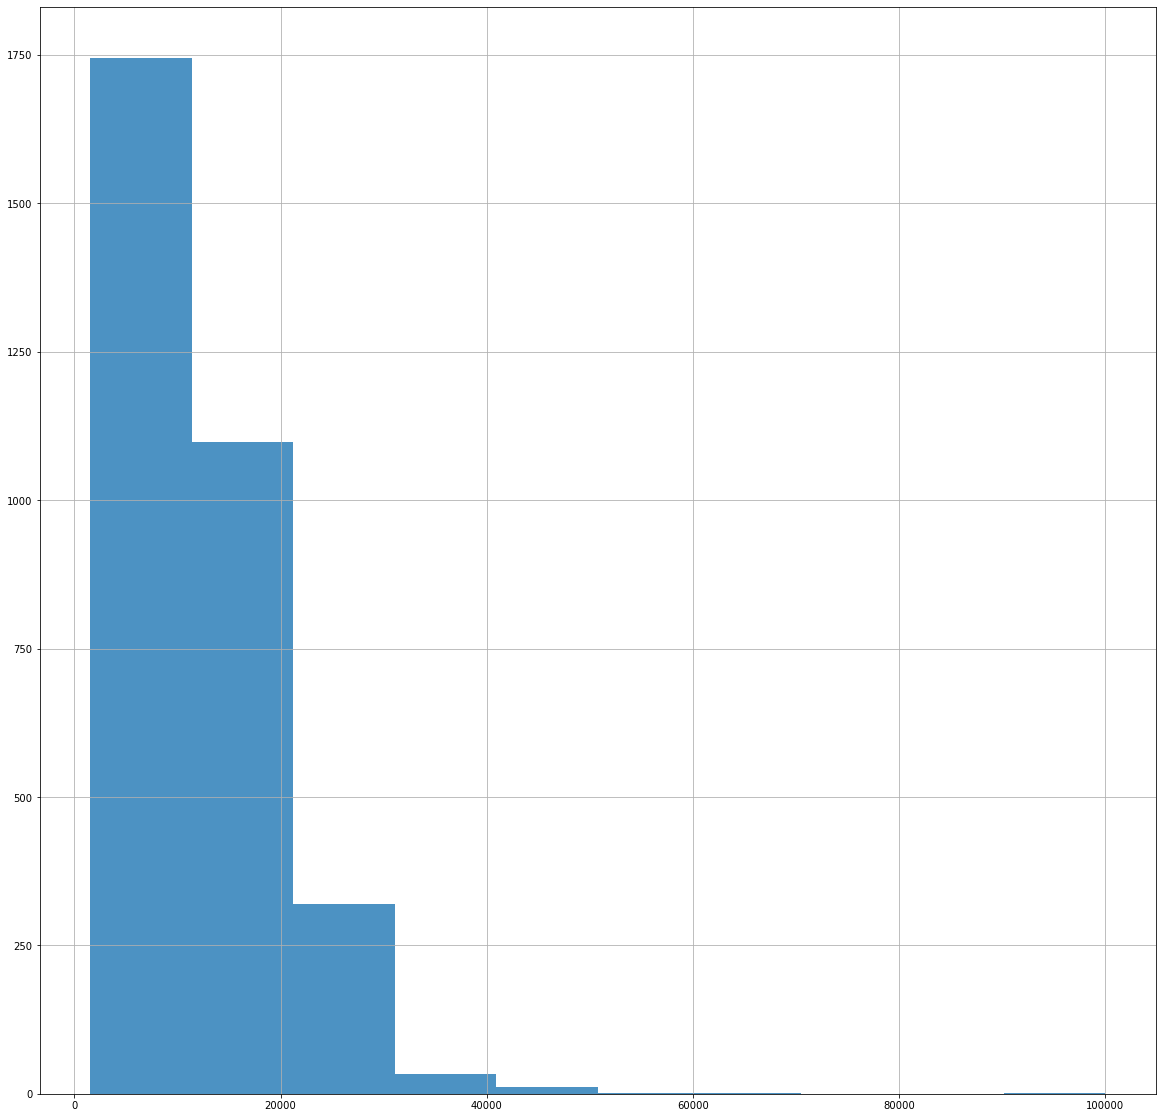

In [64]:
y.hist(alpha=0.8, figsize=(20, 20))
plt.show()

In [65]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from matplotlib import cm

y_mm = minmax_scale(y, feature_range=(0, 1))
y_mm

array([0.        , 0.00152368, 0.00152368, ..., 0.6953152 , 0.9995429 ,
       1.        ])

In [66]:
distributions = [
    ('Unscaled data', X),
    ('Data after standard scaling',
        StandardScaler().fit_transform(X)),
    ('Data after min-max scaling',
        MinMaxScaler().fit_transform(X)),
    ('Data after max-abs scaling',
        MaxAbsScaler().fit_transform(X)),
    ('Data after robust scaling',
        RobustScaler(quantile_range=(25, 75)).fit_transform(X)),
    ('Data after quantile transformation (uniform pdf)',
        QuantileTransformer(output_distribution='uniform')
        .fit_transform(X)),
    ('Data after quantile transformation (gaussian pdf)',
        QuantileTransformer(output_distribution='normal')
        .fit_transform(X)),
    ('Data after sample-wise L2 normalizing',
        Normalizer().fit_transform(X))
]

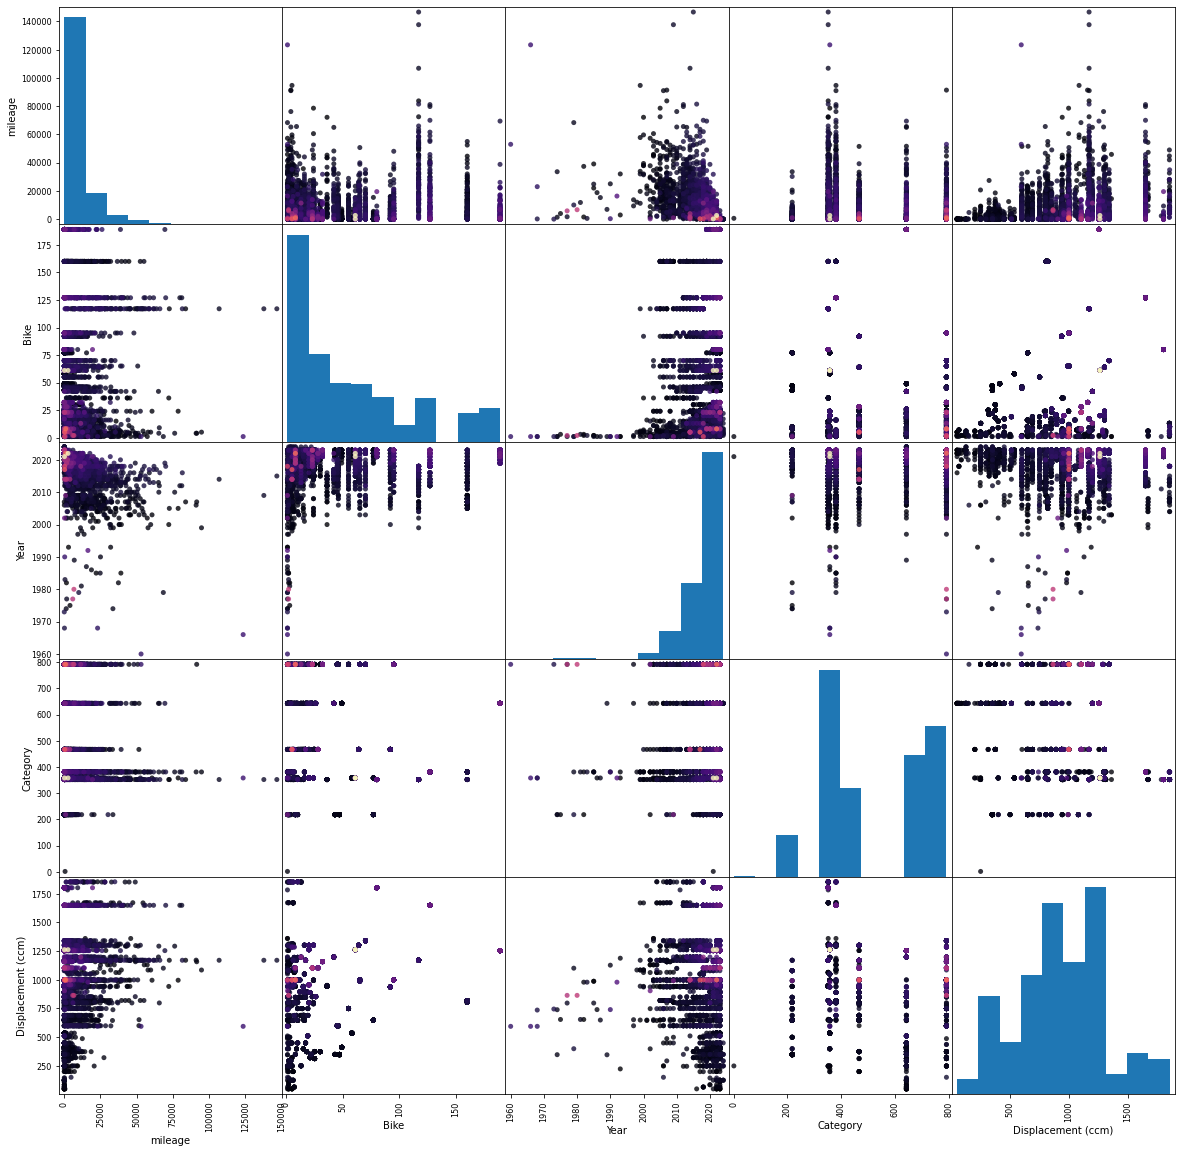

In [67]:
from pandas.plotting import scatter_matrix
scatter_matrix(distributions[0][1].iloc[:, :5],c=y_mm, alpha=0.8, figsize=(20, 20), s=100,  cmap='magma')

plt.show()

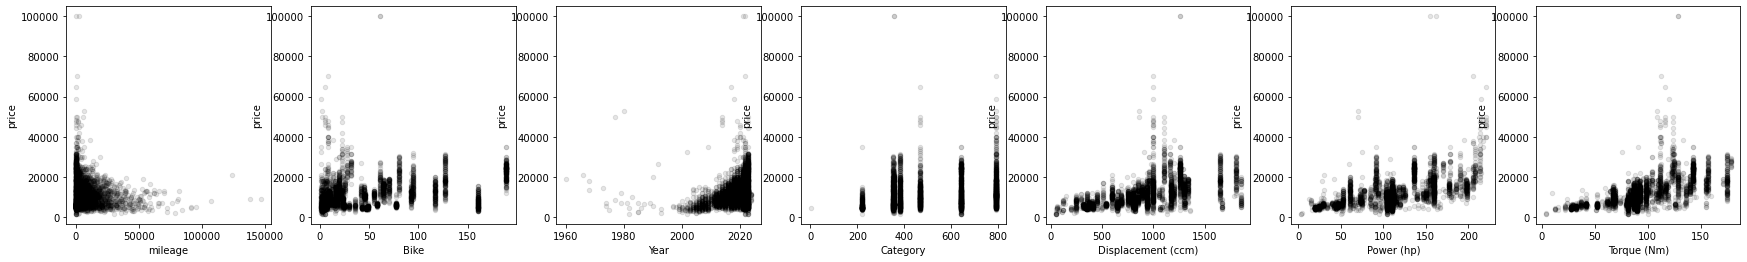

In [68]:
from pandas.plotting import scatter_matrix
#scatter_matrix(Z.iloc[:, :8],c=y, alpha=0.8, figsize=(20, 20), s=100,  cmap='magma')
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(30,4))

for xcol, ax in zip(['mileage', 'Bike', 'Year', 'Category', 'Displacement (ccm)', 'Power (hp)', 'Torque (Nm)'], axes):
    Z.plot(kind='scatter', x=xcol, y='price',ax=ax, alpha=0.1, c='black')
plt.show()

In [69]:
def create_axes(title, figsize=(16, 6)):
    fig = plt.figure(figsize=figsize)
    fig.suptitle(title)

    # define the axis for the first plot
    left, width = 0.1, 0.22
    bottom, height = 0.1, 0.7
    bottom_h = height + 0.15
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter = plt.axes(rect_scatter)
    ax_histx = plt.axes(rect_histx)
    ax_histy = plt.axes(rect_histy)

    # define the axis for the zoomed-in plot
    left = width + left + 0.2
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter_zoom = plt.axes(rect_scatter)
    ax_histx_zoom = plt.axes(rect_histx)
    ax_histy_zoom = plt.axes(rect_histy)

    # define the axis for the colorbar
    left, width = width + left + 0.13, 0.01

    rect_colorbar = [left, bottom, width, height]
    ax_colorbar = plt.axes(rect_colorbar)

    return ((ax_scatter, ax_histy, ax_histx),
            (ax_scatter_zoom, ax_histy_zoom, ax_histx_zoom),
            ax_colorbar)


def plot_distribution(axes, X, y, hist_nbins=50, title="",
                      x0_label="", x1_label=""):
    ax, hist_X1, hist_X0 = axes

    ax.set_title(title)
    ax.set_xlabel(x0_label)
    ax.set_ylabel(x1_label)

    # The scatter plot
    colors = cm.plasma_r(y)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.5, marker='o', s=20, lw=0, c=colors)

    # Removing the top and the right spine for aesthetics
    # make nice axis layout
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))

    # Histogram for axis X1 (feature 5)
    hist_X1.set_ylim(ax.get_ylim())
    hist_X1.hist(X[:, 1], bins=hist_nbins, orientation='horizontal',
                 color='grey', ec='grey')
    hist_X1.axis('off')

    # Histogram for axis X0 (feature 0)
    hist_X0.set_xlim(ax.get_xlim())
    hist_X0.hist(X[:, 0], bins=hist_nbins, orientation='vertical',
                 color='grey', ec='grey')
    hist_X0.axis('off')

In [70]:
import matplotlib as mpl

def make_plot(item_idx):
    title, X = distributions[item_idx]
    ax_zoom_out, ax_zoom_in, ax_colorbar = create_axes(title)
    axarr = (ax_zoom_out, ax_zoom_in)
    plot_distribution(axarr[0], X, y_mm, hist_nbins=200,
                      x0_label="Mileage",
                      x1_label="Year",
                      title="Full data")

    # zoom-in
    zoom_in_percentile_range = (0, 99)
    cutoffs_X0 = np.percentile(X[:, 0], zoom_in_percentile_range)
    cutoffs_X1 = np.percentile(X[:, 1], zoom_in_percentile_range)

    non_outliers_mask = (
        np.all(X[:, :2] > [cutoffs_X0[0], cutoffs_X1[0]], axis=1) & np.all(X[:, :2] < [cutoffs_X0[1], cutoffs_X1[1]], axis=1))
    plot_distribution(axarr[1], X[non_outliers_mask], y_mm[non_outliers_mask],
                      hist_nbins=50,
                      x0_label="Mileage",
                      x1_label="Year",
                      title="Zoom-in")

    #norm = mpl.colors.Normalize(y_mm.min(), y_mm.max())
    mpl.colorbar.ColorbarBase(ax_colorbar, cmap=cm.magma,
                              orientation='vertical',
                              label='Color mapping for values of y')

In [71]:
# make_plot(0)

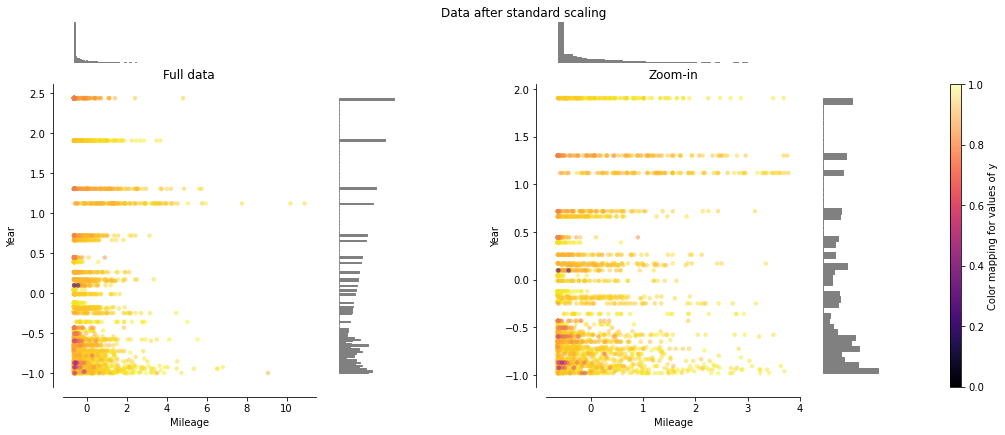

In [72]:
make_plot(1)

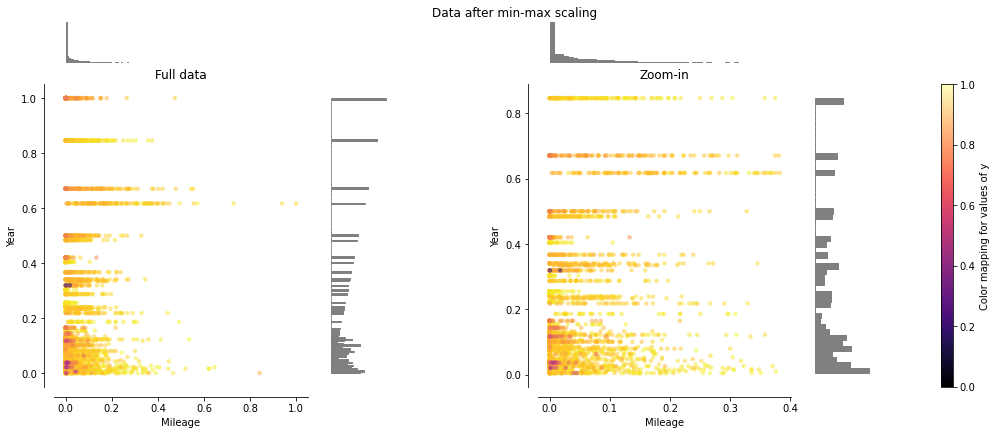

In [73]:
make_plot(2)

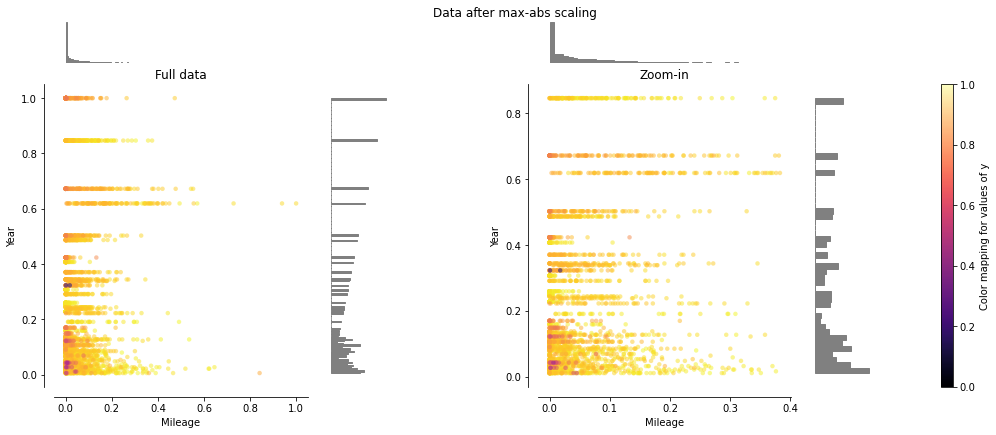

In [74]:
make_plot(3)

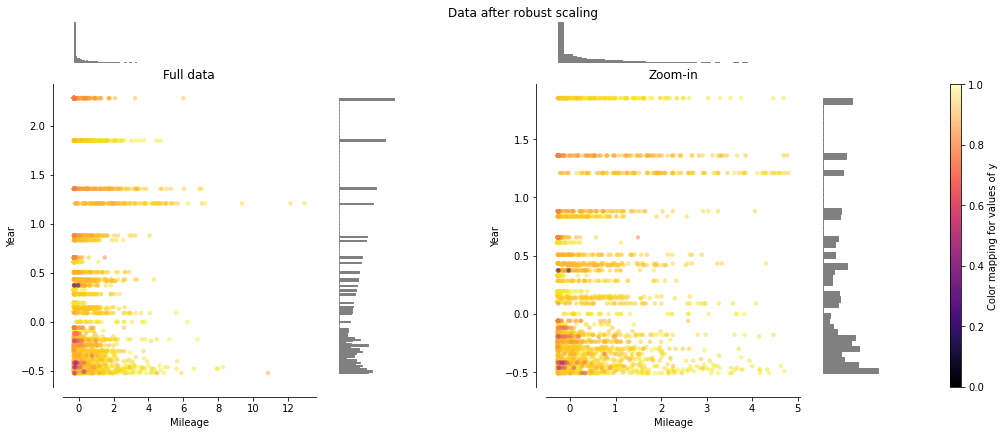

In [75]:
make_plot(4)

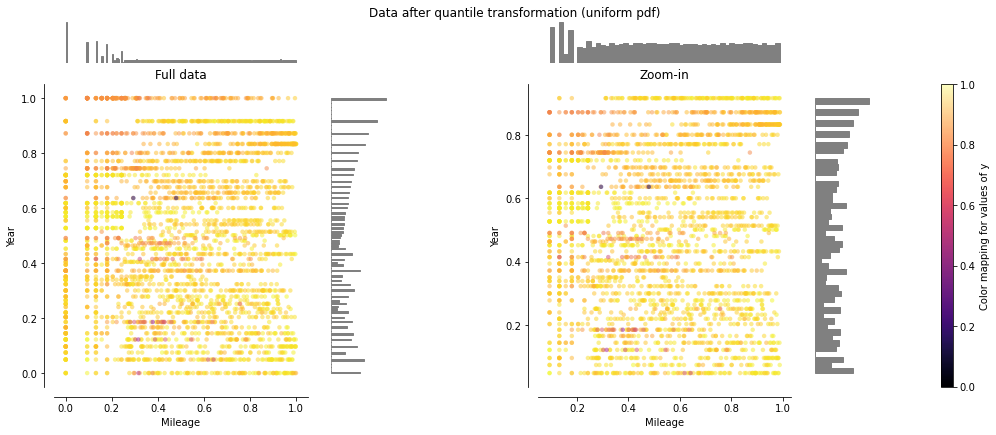

In [76]:
make_plot(5)

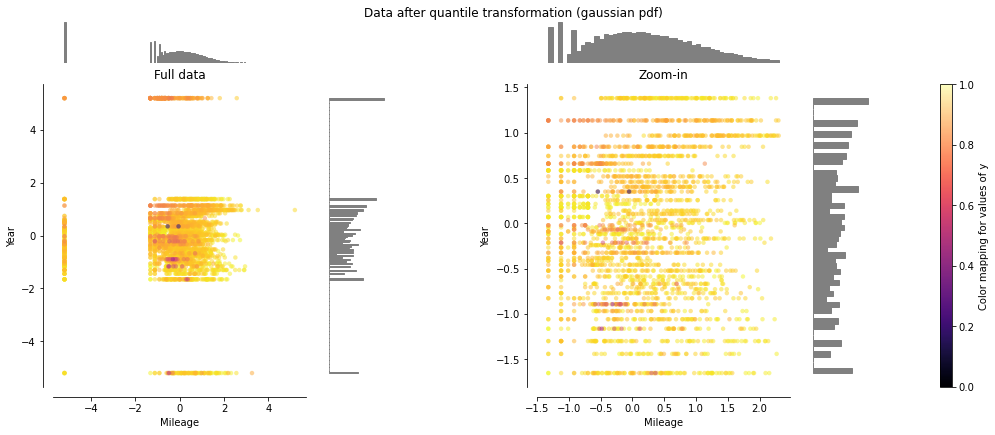

In [77]:
make_plot(6)

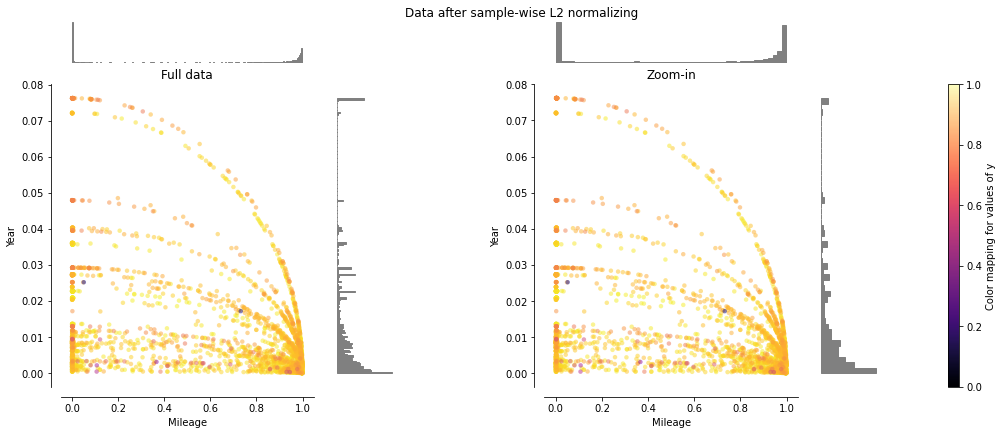

In [78]:
make_plot(7)

In [79]:
X_Robust = pd.DataFrame(RobustScaler(quantile_range=(25, 75)).fit_transform(X))
X_Normal = pd.DataFrame(QuantileTransformer(output_distribution='normal').fit_transform(X))


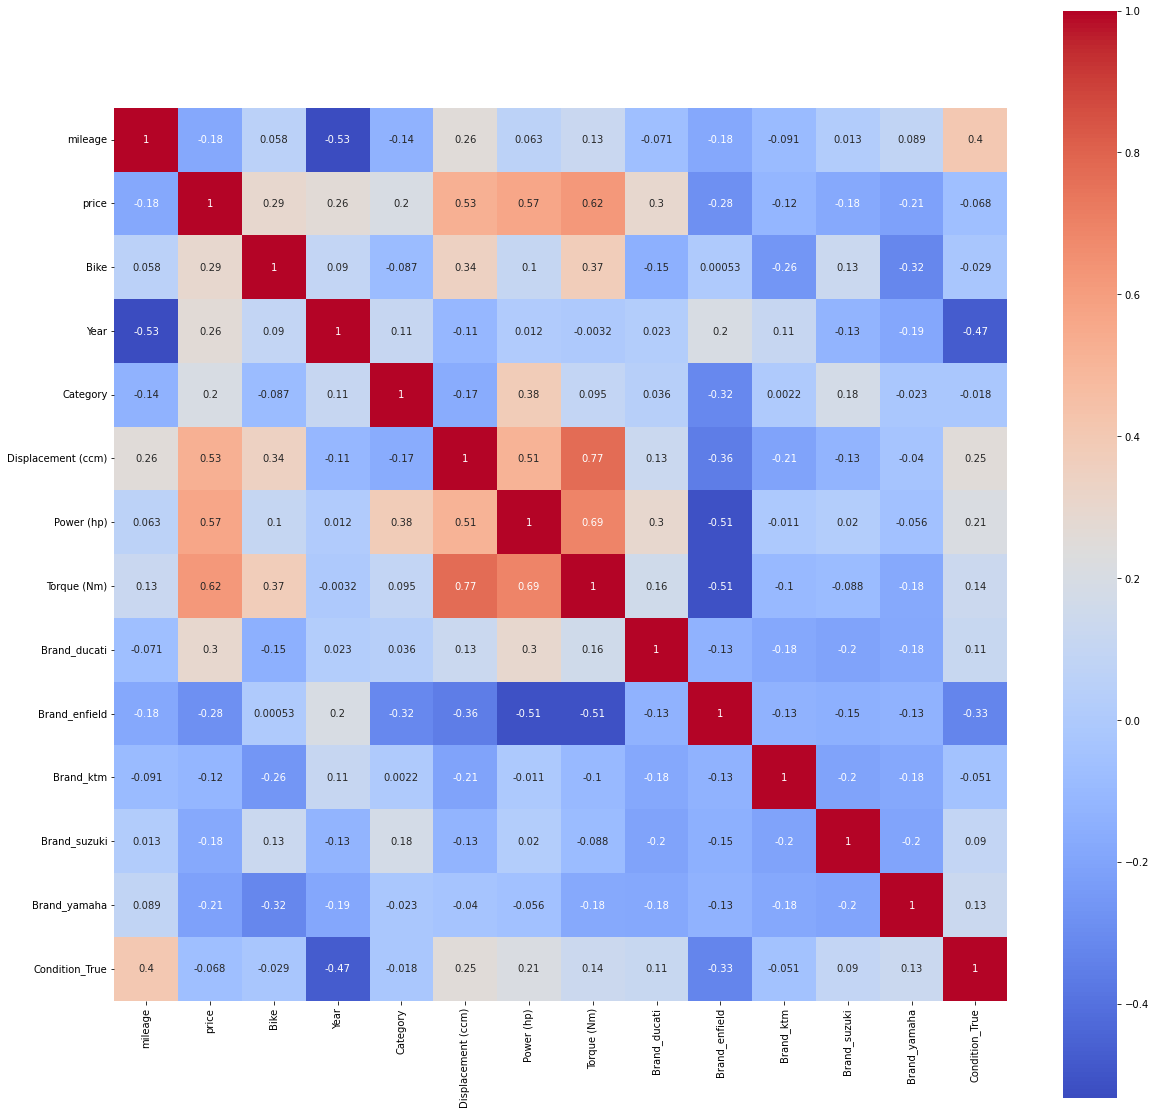

In [80]:
plt.figure(figsize=(20,20))
sns.heatmap(Z.iloc[:].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

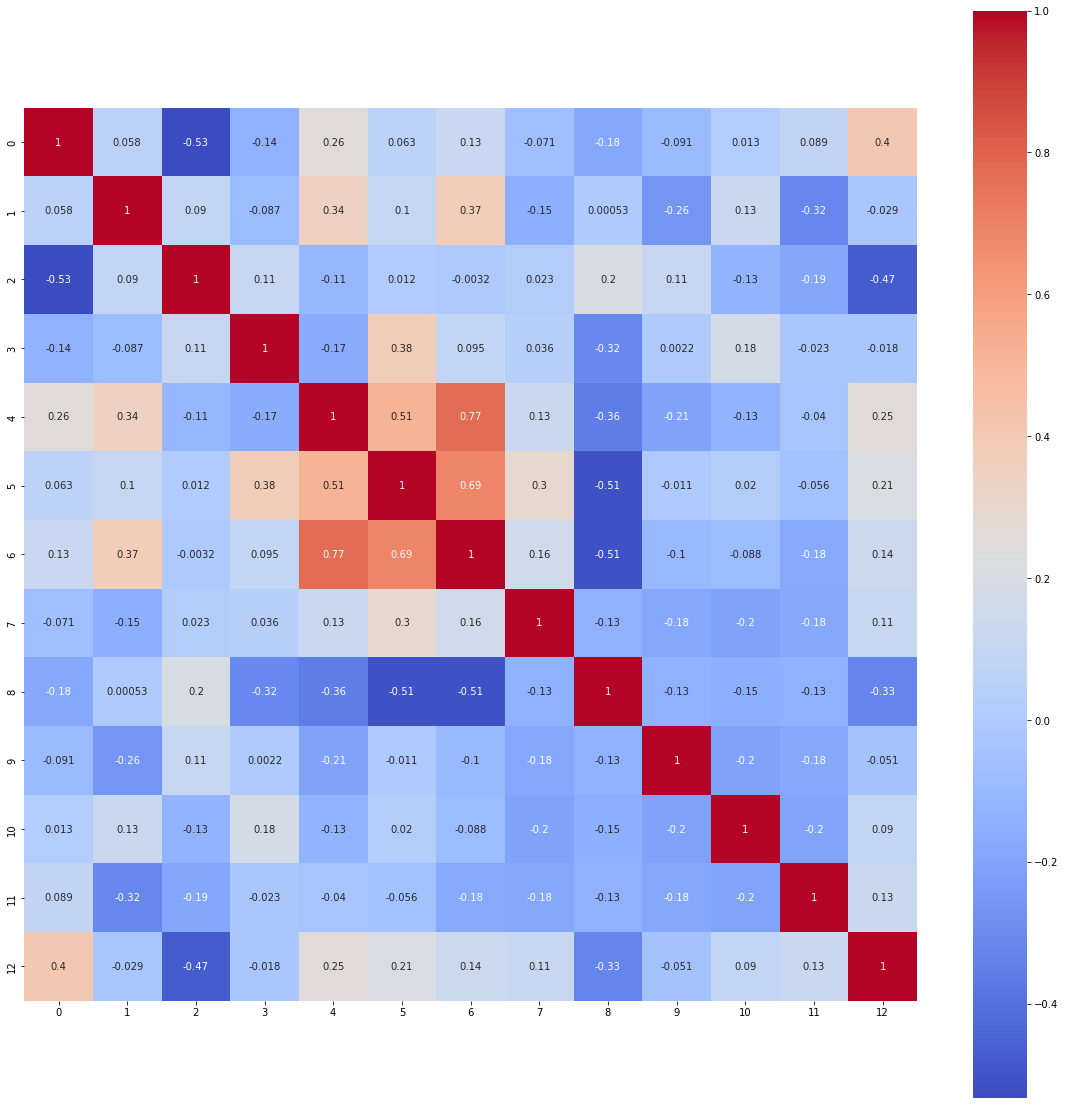

In [81]:
plt.figure(figsize=(20,20))
sns.heatmap(X_Robust.iloc[:].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

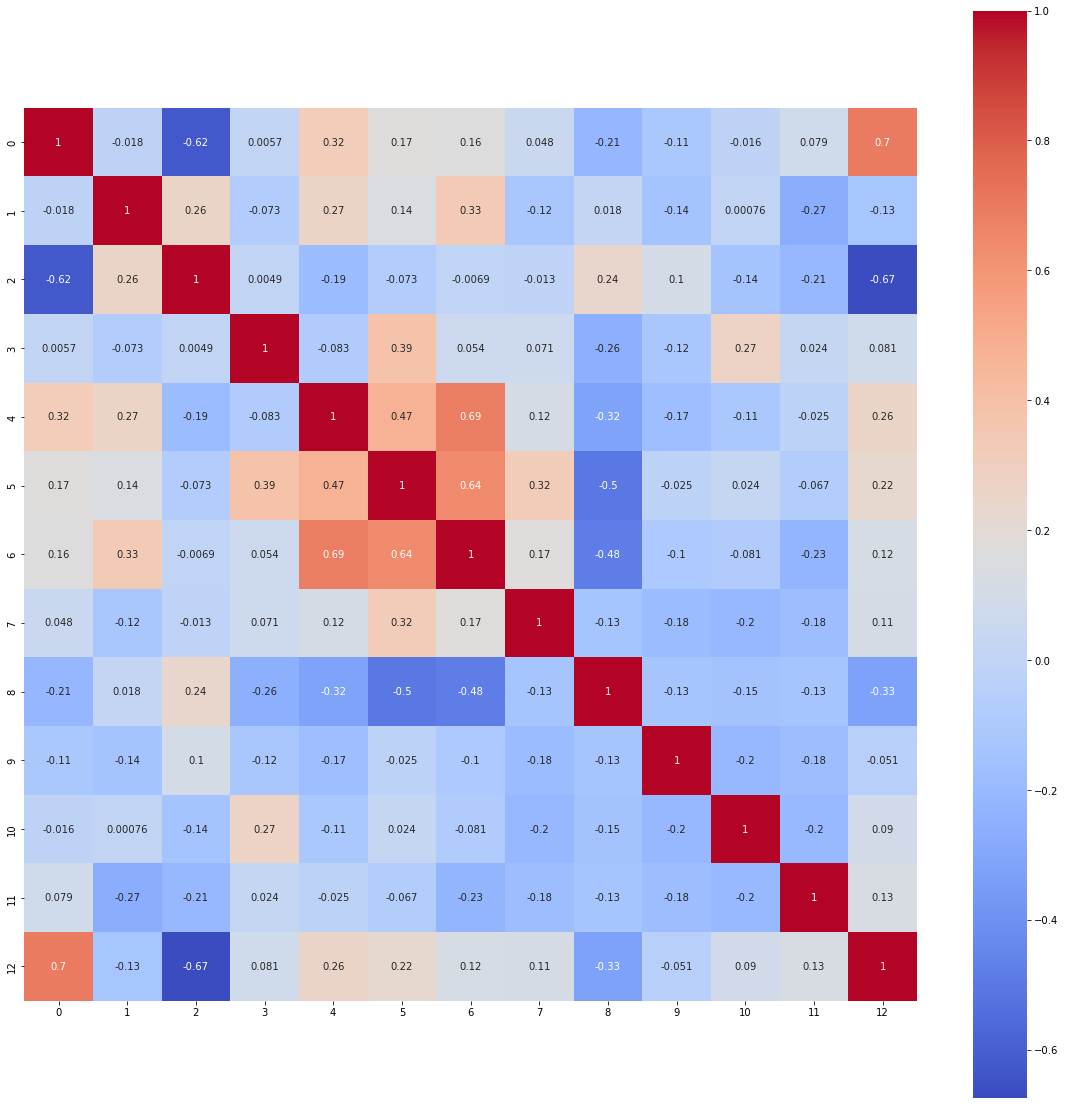

In [82]:
plt.figure(figsize=(20,20))
sns.heatmap(X_Normal.iloc[:].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

In [83]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

scaler_R = RobustScaler(quantile_range=(25, 75))
scaler_N = QuantileTransformer(output_distribution='normal')
scaler_S = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.32, random_state=42)
#X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.32, random_state=42)

#X_train1, X_test, y_train1, y_test = train_test_split(X1, y1, test_size=0.9, random_state=50)

X_train_R = pd.DataFrame(scaler_R.fit_transform(X_train))
X_train_N = pd.DataFrame(scaler_N.fit_transform(X_train))
X_train_S = pd.DataFrame(scaler_S.fit_transform(X_train))
#X1_train_S = pd.DataFrame(scaler_S.fit_transform(X1_train))

X_test_R = pd.DataFrame(scaler_R.fit_transform(X_test))
X_test_N = pd.DataFrame(scaler_N.fit_transform(X_test))
X_test_S = pd.DataFrame(scaler_S.fit_transform(X_test))
#X1_test_S = pd.DataFrame(scaler_S.fit_transform(X1_test))

scaler_y = MinMaxScaler()
y_train_mm = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).reshape(-1)
y_test_mm = scaler_y.transform(y_test.values.reshape(-1, 1)).reshape(-1)
#y_train = y_train_mm
#y_test = y_test_mm

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2184, 13)
X_test shape: (1028, 13)
y_train shape: (2184,)
y_test shape: (1028,)


In [84]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBRegressor, XGBClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)


In [1]:
# Define the parameter grid
y_log = np.log(y)

# Split the data into training and testing sets
X_train1, X_test1, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50)

y_train_log=np.log(y_train)
y_test_log= np.log(y_test)

X_train_R = pd.DataFrame(scaler_R.fit_transform(X_train1))
#X_train_N = pd.DataFrame(scaler_N.fit_transform(X_train1))
X_train_S = pd.DataFrame(scaler_S.fit_transform(X_train1))

X_test_R = pd.DataFrame(scaler_R.fit_transform(X_test1))
#X_test_N = pd.DataFrame(scaler_N.fit_transform(X_test1))
X_test_S = pd.DataFrame(scaler_S.fit_transform(X_test1))

# 
param_grid = {
    'learning_rate': [0.06, 0.08, 0.1, 0.12],
    'alpha': [0.1, 1, 1.5],
    'lambda': [0.001, 0.1, 1],
    'n_estimators': [280, 300, 320],
    'reg_alpha': [0, 0.001, 0.01],
    'reg_lambda': [0.005, 0.01, 0.02, 0.05]
}

np.int = np.int_

# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', booster='gblinear', random_state=50)

# Initialize Randomized Search
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, n_iter=200, cv=6, n_jobs=-1, verbose=2, random_state=42, scoring='neg_mean_squared_error')

# Perform Randomized Search
random_search.fit(X_train1, y_train_log)

# Get the best parameters
best_params = random_search.best_params_
print(f"Best parameters: {best_params}")

# Train the XGBoost model with the best parameters
best_xgb = xgb.XGBRegressor(objective='reg:squarederror', **best_params, random_state=42)
best_xgb.fit(X_train1, y_train_log)

# Make predictions on the test set
y_pred_xgb = best_xgb.predict(X_test1)

#y_pred_xgb_inv = scaler_y.inverse_transform(y_pred_xgb.reshape(-1, 1)).reshape(-1)

# Define the scoring function
#mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

def rmsle_score(y_true, y_pred):
    y_true = np.expm1(y_true)  # Umkehrung der log1p-Transformation
    y_pred = np.expm1(y_pred)
    return np.sqrt(mean_squared_error(y_true, y_pred))
rmsle_scorer = make_scorer(rmsle_score, greater_is_better=False)

# Perform cross-validation
#cv_scores = cross_val_score(best_xgb, X_test_N, y_test_log, cv=10, scoring=mse_scorer)
cv_scores = cross_val_score(best_xgb, X_test1, y_test_log, cv=10, scoring=rmsle_scorer)

y_pred1 = np.exp(y_pred_xgb)
y_test1 = np.exp(y_test_log)
# Evaluate the model
print(f"Cross-Validation MSE Scores: {-cv_scores}")
print(f"Mean RMSE: {-cv_scores.mean()}")
print(f"Standard Deviation of RMSE: {cv_scores.std()}")
print('Coefficient of determination: %.2f' % r2_score(y_test_log, y_pred_xgb))

NameError: name 'np' is not defined

Normal: 

Best parameters: {'reg_lambda': 0.01, 'reg_alpha': 0, 'n_estimators': 320, 'learning_rate': 0.12, 'lambda': 0.001, 'alpha': 1.5}

Cross-Validation MSE Scores: [2709.45120405 2910.13602918 2965.63948957 3171.18237329 2432.12331577
 3131.72918101 2653.1418376  2445.29731069 2661.99009239 2975.03583884]
 
Mean RMSE: 2805.5726672405144

Standard Deviation of RMSE: 250.5343049148067

Coefficient of determination: 0.90

Robust:

Best parameters: {'reg_lambda': 0.005, 'reg_alpha': 0, 'n_estimators': 300, 'learning_rate': 0.12, 'lambda': 0.1, 'alpha': 1.5}

Cross-Validation MSE Scores: [2635.39149334 2877.98673029 3060.9710873  3221.48039378 2421.98653429
 3331.74451615 2682.28698325 2549.38906954 2592.64237694 3005.27088107]
 
Mean RMSE: 2837.915006595112

Standard Deviation of RMSE: 291.88969937442107

Coefficient of determination: 0.82

Standard:

Best parameters: {'reg_lambda': 0.01, 'reg_alpha': 0, 'n_estimators': 320, 'learning_rate': 0.12, 'lambda': 0.001, 'alpha': 1.5}

Cross-Validation MSE Scores: [2709.45120405 2910.13602918 2965.63948957 3171.18237329 2432.12331577
 3131.72918101 2653.1418376  2445.29731069 2661.99009239 2975.03583884]
 
Mean RMSE: 2805.5726672405144

Standard Deviation of RMSE: 250.5343049148067

Coefficient of determination: 0.83

Quantile:

Cross-Validation MSE Scores: [2924.2015741  2998.71771984 3173.24013472 3267.86615027 3190.67676823
 2430.16788063 2475.02695296 2277.38520495 3103.65035361 3382.79528894]
 
Mean RMSE: 2922.3728028256837

Standard Deviation of RMSE: 369.237375183695

Coefficient of determination: 0.86

In [116]:
y_true = np.expm1(y_test_log)  # Umkehrung der log1p-Transformation
y_pred = np.expm1(y_pred_xgb)

df_1 = pd.DataFrame(y_pred, y_true)
df_1


,0
price,
27594.0,26094.183594
16998.0,17349.199219
23994.0,27305.054688
4498.0,4442.881348
20994.0,24982.976562
...,...
27464.0,23428.236328
8499.0,6020.746582
6199.0,4372.637695


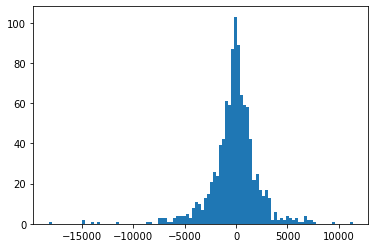

[CV] END alpha=1, lambda=1, learning_rate=0.1, n_estimators=300, reg_alpha=0.001, reg_lambda=0.01; total time=   0.1s
[CV] END alpha=1, lambda=1, learning_rate=0.1, n_estimators=300, reg_alpha=0.001, reg_lambda=0.01; total time=   0.1s
[CV] END alpha=1.5, lambda=0.1, learning_rate=0.12, n_estimators=300, reg_alpha=0, reg_lambda=0.005; total time=   0.1s
[CV] END alpha=1.5, lambda=0.1, learning_rate=0.12, n_estimators=300, reg_alpha=0, reg_lambda=0.005; total time=   0.1s
[CV] END alpha=1.5, lambda=0.001, learning_rate=0.1, n_estimators=280, reg_alpha=0.01, reg_lambda=0.01; total time=   0.1s
[CV] END alpha=1.5, lambda=0.001, learning_rate=0.1, n_estimators=280, reg_alpha=0.01, reg_lambda=0.01; total time=   0.1s
[CV] END alpha=1, lambda=0.001, learning_rate=0.08, n_estimators=300, reg_alpha=0.001, reg_lambda=0.02; total time=   0.1s
[CV] END alpha=1, lambda=0.001, learning_rate=0.08, n_estimators=300, reg_alpha=0.001, reg_lambda=0.02; total time=   0.1s
[CV] END alpha=1.5, lambda=0.001

[CV] END alpha=1.5, lambda=0.1, learning_rate=0.1, n_estimators=280, reg_alpha=0.01, reg_lambda=0.05; total time=   0.1s
[CV] END alpha=1.5, lambda=0.001, learning_rate=0.12, n_estimators=320, reg_alpha=0.01, reg_lambda=0.02; total time=   0.1s
[CV] END alpha=1.5, lambda=0.001, learning_rate=0.12, n_estimators=320, reg_alpha=0.01, reg_lambda=0.02; total time=   0.1s
[CV] END alpha=1.5, lambda=1, learning_rate=0.12, n_estimators=300, reg_alpha=0, reg_lambda=0.05; total time=   0.1s
[CV] END alpha=1.5, lambda=1, learning_rate=0.12, n_estimators=300, reg_alpha=0, reg_lambda=0.05; total time=   0.1s
[CV] END alpha=1, lambda=0.1, learning_rate=0.1, n_estimators=320, reg_alpha=0.001, reg_lambda=0.05; total time=   0.1s
[CV] END alpha=1, lambda=0.1, learning_rate=0.1, n_estimators=320, reg_alpha=0.001, reg_lambda=0.05; total time=   0.1s
[CV] END alpha=0.1, lambda=0.1, learning_rate=0.1, n_estimators=300, reg_alpha=0.001, reg_lambda=0.01; total time=   0.1s
[CV] END alpha=0.1, lambda=0.1, lea

[CV] END alpha=1, lambda=1, learning_rate=0.12, n_estimators=320, reg_alpha=0, reg_lambda=0.05; total time=   0.1s
[CV] END alpha=1, lambda=1, learning_rate=0.12, n_estimators=280, reg_alpha=0.01, reg_lambda=0.02; total time=   0.1s
[CV] END alpha=1, lambda=1, learning_rate=0.12, n_estimators=280, reg_alpha=0.01, reg_lambda=0.02; total time=   0.1s
[CV] END alpha=1, lambda=0.1, learning_rate=0.08, n_estimators=280, reg_alpha=0.001, reg_lambda=0.02; total time=   0.1s
[CV] END alpha=1, lambda=0.1, learning_rate=0.08, n_estimators=280, reg_alpha=0.001, reg_lambda=0.02; total time=   0.1s
[CV] END alpha=1.5, lambda=1, learning_rate=0.06, n_estimators=280, reg_alpha=0.001, reg_lambda=0.005; total time=   0.1s
[CV] END alpha=1.5, lambda=1, learning_rate=0.06, n_estimators=280, reg_alpha=0.001, reg_lambda=0.005; total time=   0.1s
[CV] END alpha=0.1, lambda=0.1, learning_rate=0.1, n_estimators=300, reg_alpha=0.001, reg_lambda=0.01; total time=   0.1s
[CV] END alpha=0.1, lambda=0.1, learning_

[CV] END alpha=1, lambda=0.001, learning_rate=0.12, n_estimators=280, reg_alpha=0.01, reg_lambda=0.05; total time=   0.1s
[CV] END alpha=0.1, lambda=1, learning_rate=0.1, n_estimators=280, reg_alpha=0.001, reg_lambda=0.05; total time=   0.1s
[CV] END alpha=0.1, lambda=0.1, learning_rate=0.12, n_estimators=280, reg_alpha=0.01, reg_lambda=0.01; total time=   0.1s
[CV] END alpha=0.1, lambda=0.1, learning_rate=0.12, n_estimators=280, reg_alpha=0.01, reg_lambda=0.01; total time=   0.2s
[CV] END alpha=1.5, lambda=0.1, learning_rate=0.1, n_estimators=320, reg_alpha=0, reg_lambda=0.05; total time=   0.1s
[CV] END alpha=1.5, lambda=0.1, learning_rate=0.1, n_estimators=320, reg_alpha=0, reg_lambda=0.05; total time=   0.1s
[CV] END alpha=1.5, lambda=0.001, learning_rate=0.1, n_estimators=320, reg_alpha=0.01, reg_lambda=0.02; total time=   0.1s
[CV] END alpha=1.5, lambda=0.001, learning_rate=0.1, n_estimators=320, reg_alpha=0.01, reg_lambda=0.02; total time=   0.1s
[CV] END alpha=0.1, lambda=0.001

[CV] END alpha=1.5, lambda=0.001, learning_rate=0.1, n_estimators=320, reg_alpha=0.01, reg_lambda=0.02; total time=   0.1s
[CV] END alpha=1, lambda=1, learning_rate=0.06, n_estimators=280, reg_alpha=0, reg_lambda=0.01; total time=   0.1s
[CV] END alpha=1, lambda=1, learning_rate=0.06, n_estimators=280, reg_alpha=0, reg_lambda=0.01; total time=   0.1s
[CV] END alpha=0.1, lambda=0.001, learning_rate=0.1, n_estimators=280, reg_alpha=0.01, reg_lambda=0.01; total time=   0.1s
[CV] END alpha=0.1, lambda=0.001, learning_rate=0.1, n_estimators=280, reg_alpha=0.01, reg_lambda=0.01; total time=   0.1s
[CV] END alpha=1, lambda=0.1, learning_rate=0.06, n_estimators=300, reg_alpha=0, reg_lambda=0.05; total time=   0.1s
[CV] END alpha=1, lambda=0.1, learning_rate=0.06, n_estimators=300, reg_alpha=0, reg_lambda=0.05; total time=   0.1s
[CV] END alpha=1, lambda=1, learning_rate=0.12, n_estimators=300, reg_alpha=0, reg_lambda=0.02; total time=   0.1s
[CV] END alpha=1, lambda=1, learning_rate=0.12, n_es

In [117]:
plt.hist(y_pred-y_true, bins = 100)
#plt.hist(y_test1, bins = 100)
plt.show()

In [122]:
# Define the parameter grid
#y_log = np.log(y)

# Split the data into training and testing sets
#X_train1, X_test1, y_train_mm, y_test_mm = train_test_split(X, y_mm, test_size=0.32, random_state=50)

X_train_R = pd.DataFrame(scaler_R.fit_transform(X_train1))
#X_train_N = pd.DataFrame(scaler_N.fit_transform(X_train1))
X_train_S = pd.DataFrame(scaler_S.fit_transform(X_train1))

X_test_R = pd.DataFrame(scaler_R.fit_transform(X_test1))
#X_test_N = pd.DataFrame(scaler_N.fit_transform(X_test1))
X_test_S = pd.DataFrame(scaler_S.fit_transform(X_test1))

y_train_mm = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).reshape(-1)
y_test_mm = scaler_y.transform(y_test.values.reshape(-1, 1)).reshape(-1)
# 
param_grid = {
    'n_estimators': [250, 300, 340],
    'learning_rate': [0.03, 0.05, 0.08],
    'max_depth': [4, 5, 6, 15],
    'min_child_weight': [2, 3, 5],
    'subsample': [0.4, 0.6, 0.8, 1.0],
    'colsample_bytree': [0.3, 0.6, 0.8],
    'gamma': [0, 0.1, 0.3, 0.5],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0, 0.01, 0.1, 1]
}
np.int = np.int_

# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=50)

# Initialize Randomized Search
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, n_iter=100, cv=6, n_jobs=-1, verbose=2, random_state=42, scoring='neg_mean_squared_error')

# Perform Randomized Search
random_search.fit(X_train1, y_train_mm)

# Get the best parameters
best_params = random_search.best_params_
print(f"Best parameters: {best_params}")

# Train the XGBoost model with the best parameters
best_xgb1 = xgb.XGBRegressor(objective='reg:squarederror', **best_params, random_state=42)
best_xgb1.fit(X_train1, y_train_mm)

# Make predictions on the test set
y_pred_xgb = best_xgb1.predict(X_test1)

#y_pred_xgb_inv = scaler_y.inverse_transform(y_pred_xgb.reshape(-1, 1)).reshape(-1)

# Define the scoring function
#mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

def rmsle_score(y_true, y_pred):
    y_pred = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).reshape(-1)
    y_true = scaler_y.inverse_transform(y_true.reshape(-1, 1)).reshape(-1)
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmsle_scorer = make_scorer(rmsle_score, greater_is_better=False)

# Perform cross-validation
#cv_scores = cross_val_score(best_xgb, X_test_N, y_test_log, cv=10, scoring=mse_scorer)
cv_scores = cross_val_score(best_xgb1, X_test1, y_test_mm, cv=10, scoring=rmsle_scorer)

#y_pred1 = np.exp(y_pred_xgb)
#y_test1 = np.exp(y_test_log)
# Evaluate the model
print(f"Cross-Validation MSE Scores: {-cv_scores}")
print(f"Mean RMSE: {-cv_scores.mean()}")
print(f"Standard Deviation of RMSE: {cv_scores.std()}")
print('Coefficient of determination: %.2f' % r2_score(y_test_mm, y_pred_xgb))

Fitting 6 folds for each of 100 candidates, totalling 600 fits
[CV] END alpha=1.5, lambda=1, learning_rate=0.06, n_estimators=300, reg_alpha=0.01, reg_lambda=0.005; total time=   0.1s
[CV] END alpha=1, lambda=1, learning_rate=0.1, n_estimators=300, reg_alpha=0.001, reg_lambda=0.01; total time=   0.1s
[CV] END alpha=1, lambda=1, learning_rate=0.1, n_estimators=300, reg_alpha=0.001, reg_lambda=0.01; total time=   0.1s
[CV] END alpha=1, lambda=1, learning_rate=0.08, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01; total time=   0.1s
[CV] END alpha=1, lambda=1, learning_rate=0.08, n_estimators=300, reg_alpha=0.01, reg_lambda=0.01; total time=   0.1s
[CV] END alpha=1.5, lambda=0.001, learning_rate=0.08, n_estimators=320, reg_alpha=0, reg_lambda=0.005; total time=   0.1s
[CV] END alpha=1.5, lambda=0.001, learning_rate=0.08, n_estimators=320, reg_alpha=0, reg_lambda=0.005; total time=   0.1s
[CV] END alpha=1, lambda=1, learning_rate=0.12, n_estimators=320, reg_alpha=0, reg_lambda=0.05; tota

[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.08, max_depth=15, min_child_weight=2, n_estimators=340, reg_alpha=0.1, reg_lambda=0.01, subsample=0.8; total time=   0.1s[CV] END alpha=1.5, lambda=0.001, learning_rate=0.12, n_estimators=320, reg_alpha=0, reg_lambda=0.01; total time=   0.1s
[CV] END alpha=1.5, lambda=0.001, learning_rate=0.12, n_estimators=320, reg_alpha=0, reg_lambda=0.01; total time=   0.1s
[CV] END alpha=1.5, lambda=0.001, learning_rate=0.06, n_estimators=280, reg_alpha=0, reg_lambda=0.01; total time=   0.1s
[CV] END alpha=1.5, lambda=0.001, learning_rate=0.06, n_estimators=280, reg_alpha=0, reg_lambda=0.01; total time=   0.1s
[CV] END alpha=0.1, lambda=1, learning_rate=0.12, n_estimators=300, reg_alpha=0, reg_lambda=0.02; total time=   0.1s
[CV] END alpha=0.1, lambda=1, learning_rate=0.12, n_estimators=300, reg_alpha=0, reg_lambda=0.02; total time=   0.1s
[CV] END alpha=0.1, lambda=0.001, learning_rate=0.08, n_estimators=300, reg_alpha=0.01, reg_lambda=0.02

[CV] END alpha=1, lambda=0.001, learning_rate=0.12, n_estimators=320, reg_alpha=0.01, reg_lambda=0.01; total time=   0.1s
[CV] END alpha=0.1, lambda=0.1, learning_rate=0.12, n_estimators=320, reg_alpha=0, reg_lambda=0.01; total time=   0.1s
[CV] END alpha=0.1, lambda=0.1, learning_rate=0.12, n_estimators=320, reg_alpha=0, reg_lambda=0.01; total time=   0.1s
[CV] END alpha=1, lambda=0.001, learning_rate=0.12, n_estimators=300, reg_alpha=0, reg_lambda=0.02; total time=   0.1s
[CV] END alpha=1, lambda=0.001, learning_rate=0.12, n_estimators=300, reg_alpha=0, reg_lambda=0.02; total time=   0.1s
[CV] END alpha=1.5, lambda=1, learning_rate=0.08, n_estimators=300, reg_alpha=0, reg_lambda=0.02; total time=   0.1s
[CV] END alpha=1.5, lambda=1, learning_rate=0.08, n_estimators=300, reg_alpha=0, reg_lambda=0.02; total time=   0.1s
[CV] END alpha=0.1, lambda=1, learning_rate=0.08, n_estimators=320, reg_alpha=0, reg_lambda=0.02; total time=   0.1s
[CV] END alpha=0.1, lambda=1, learning_rate=0.08, n

[CV] END alpha=1, lambda=1, learning_rate=0.1, n_estimators=300, reg_alpha=0.001, reg_lambda=0.005; total time=   0.1s
[CV] END alpha=0.1, lambda=0.001, learning_rate=0.12, n_estimators=280, reg_alpha=0.001, reg_lambda=0.01; total time=   0.1s
[CV] END alpha=0.1, lambda=0.001, learning_rate=0.12, n_estimators=280, reg_alpha=0.001, reg_lambda=0.01; total time=   0.1s
[CV] END alpha=1.5, lambda=0.001, learning_rate=0.06, n_estimators=320, reg_alpha=0, reg_lambda=0.01; total time=   0.1s
[CV] END alpha=1.5, lambda=0.001, learning_rate=0.06, n_estimators=320, reg_alpha=0, reg_lambda=0.01; total time=   0.1s
[CV] END alpha=1.5, lambda=1, learning_rate=0.08, n_estimators=320, reg_alpha=0.001, reg_lambda=0.005; total time=   0.1s
[CV] END alpha=1.5, lambda=1, learning_rate=0.08, n_estimators=320, reg_alpha=0.001, reg_lambda=0.005; total time=   0.1s
[CV] END alpha=1.5, lambda=0.001, learning_rate=0.1, n_estimators=280, reg_alpha=0.01, reg_lambda=0.05; total time=   0.1s
[CV] END alpha=1.5, la

[CV] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.03, max_depth=15, min_child_weight=3, n_estimators=250, reg_alpha=1, reg_lambda=0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.03, max_depth=5, min_child_weight=3, n_estimators=250, reg_alpha=0.01, reg_lambda=0.01, subsample=0.4; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.08, max_depth=15, min_child_weight=2, n_estimators=340, reg_alpha=0.1, reg_lambda=0.01, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=340, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=340, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.08, max_depth=4, min_child_weight=5, n_estimators=250, 

[CV] END alpha=1.5, lambda=1, learning_rate=0.08, n_estimators=300, reg_alpha=0.001, reg_lambda=0.01; total time=   0.1s
[CV] END alpha=1, lambda=0.001, learning_rate=0.08, n_estimators=300, reg_alpha=0, reg_lambda=0.01; total time=   0.1s
[CV] END alpha=1, lambda=0.001, learning_rate=0.08, n_estimators=300, reg_alpha=0, reg_lambda=0.01; total time=   0.1s
[CV] END alpha=1, lambda=1, learning_rate=0.08, n_estimators=280, reg_alpha=0.01, reg_lambda=0.005; total time=   0.1s
[CV] END alpha=1, lambda=1, learning_rate=0.08, n_estimators=280, reg_alpha=0.01, reg_lambda=0.005; total time=   0.1s
[CV] END alpha=1.5, lambda=0.1, learning_rate=0.08, n_estimators=280, reg_alpha=0.001, reg_lambda=0.005; total time=   0.1s
[CV] END alpha=1.5, lambda=0.1, learning_rate=0.08, n_estimators=280, reg_alpha=0.001, reg_lambda=0.005; total time=   0.1s
[CV] END colsample_bytree=0.3, gamma=0, learning_rate=0.03, max_depth=5, min_child_weight=3, n_estimators=300, reg_alpha=0.01, reg_lambda=1, subsample=0.4;

Cross-Validation MSE Scores: [2347.31504449 2533.0123613  2811.74776478 3177.9591679  2371.96648078
 2929.99981599 2687.07236703 2897.05628332 2656.41323006 2885.18076232]
Mean RMSE: 2729.772327798092
Standard Deviation of RMSE: 249.00523934924718
Coefficient of determination: 0.87
